# CCT MSc in DA - Capstone Project

### Student Number - SBS23038

### Title: The economic impact of applying advanced machine learning methods to predict borrower default for regulatory capital requirements

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import shap
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm

### 1. Exploratory Data Analysis

#### In this section of the code we get a feel for the fata that we have imported

In [2]:
mortgage = pd.read_csv("mortgage.csv")

In [3]:
mortgage.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [4]:
mortgage.tail()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
622484,50000,56,16,52,177,517107.42,57.659403,2.664,181.43,1.717053,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622485,50000,57,16,52,177,512274.57,55.359916,2.652,187.20,2.556052,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622486,50000,58,16,52,177,507396.72,54.492206,2.644,188.37,2.868594,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622487,50000,59,16,52,177,502478.87,54.171106,2.638,187.65,2.443648,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622488,50000,60,16,52,177,497521.35,53.023479,2.635,189.82,2.836358,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0


In [5]:
print('The shape of the mortgage dataset is:', mortgage.shape)

The shape of the mortgage dataset is: (622489, 23)


In [6]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [7]:
missing_counts = mortgage.isnull().sum()

print("Missing Counts:")
print(missing_counts)

Missing Counts:
id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64


In [8]:
missing_counts

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

In [9]:
distinct_counts = mortgage.nunique()

print("Distinct Counts:")
print(distinct_counts)

Distinct Counts:
id                          50000
time                           60
orig_time                      98
first_time                     50
mat_time                      202
balance_time               482832
LTV_time                   567800
interest_rate_time           5539
hpi_time                       60
gdp_time                       60
uer_time                       36
REtype_CO_orig_time             2
REtype_PU_orig_time             2
REtype_SF_orig_time             2
investor_orig_time              2
balance_orig_time           10694
FICO_orig_time                397
LTV_orig_time                 552
Interest_Rate_orig_time      1825
hpi_orig_time                  97
default_time                    2
payoff_time                     2
status_time                     3
dtype: int64


In [351]:
mortgage['default_time'].value_counts()

default_time
0    607331
1     15158
Name: count, dtype: int64

#### The code below runs an interactive plot of the different featres of the mortgages dataset

In [11]:
df = mortgage
app = JupyterDash(__name__)
app.layout = html.Div(children = [
    html.Div([
    html.H1("Mortgage Dataset - Variables"),
        html.Div(children='''Dashboard: Plot'''),
    dcc.Graph(id='graph'),
    html.Label([
        "variables",
        dcc.Dropdown(
            id='var-dropdown', clearable=False,
            value='id', options=
                list(df.columns[0:len(df.columns)-1]))
    ]),
])
])

@app.callback(
Output('graph','figure'),
    [Input('var-dropdown', 'value')])

def update_graph(variables):
    return px.histogram(
        df[variables] ,nbins = 30, title=variables)
app.run_server(mode='inline', debug=False)

In [11]:
df = mortgage

In [12]:
list(df.columns[0:len(df.columns)-1])

['id',
 'time',
 'orig_time',
 'first_time',
 'mat_time',
 'balance_time',
 'LTV_time',
 'interest_rate_time',
 'hpi_time',
 'gdp_time',
 'uer_time',
 'REtype_CO_orig_time',
 'REtype_PU_orig_time',
 'REtype_SF_orig_time',
 'investor_orig_time',
 'balance_orig_time',
 'FICO_orig_time',
 'LTV_orig_time',
 'Interest_Rate_orig_time',
 'hpi_orig_time',
 'default_time',
 'payoff_time']

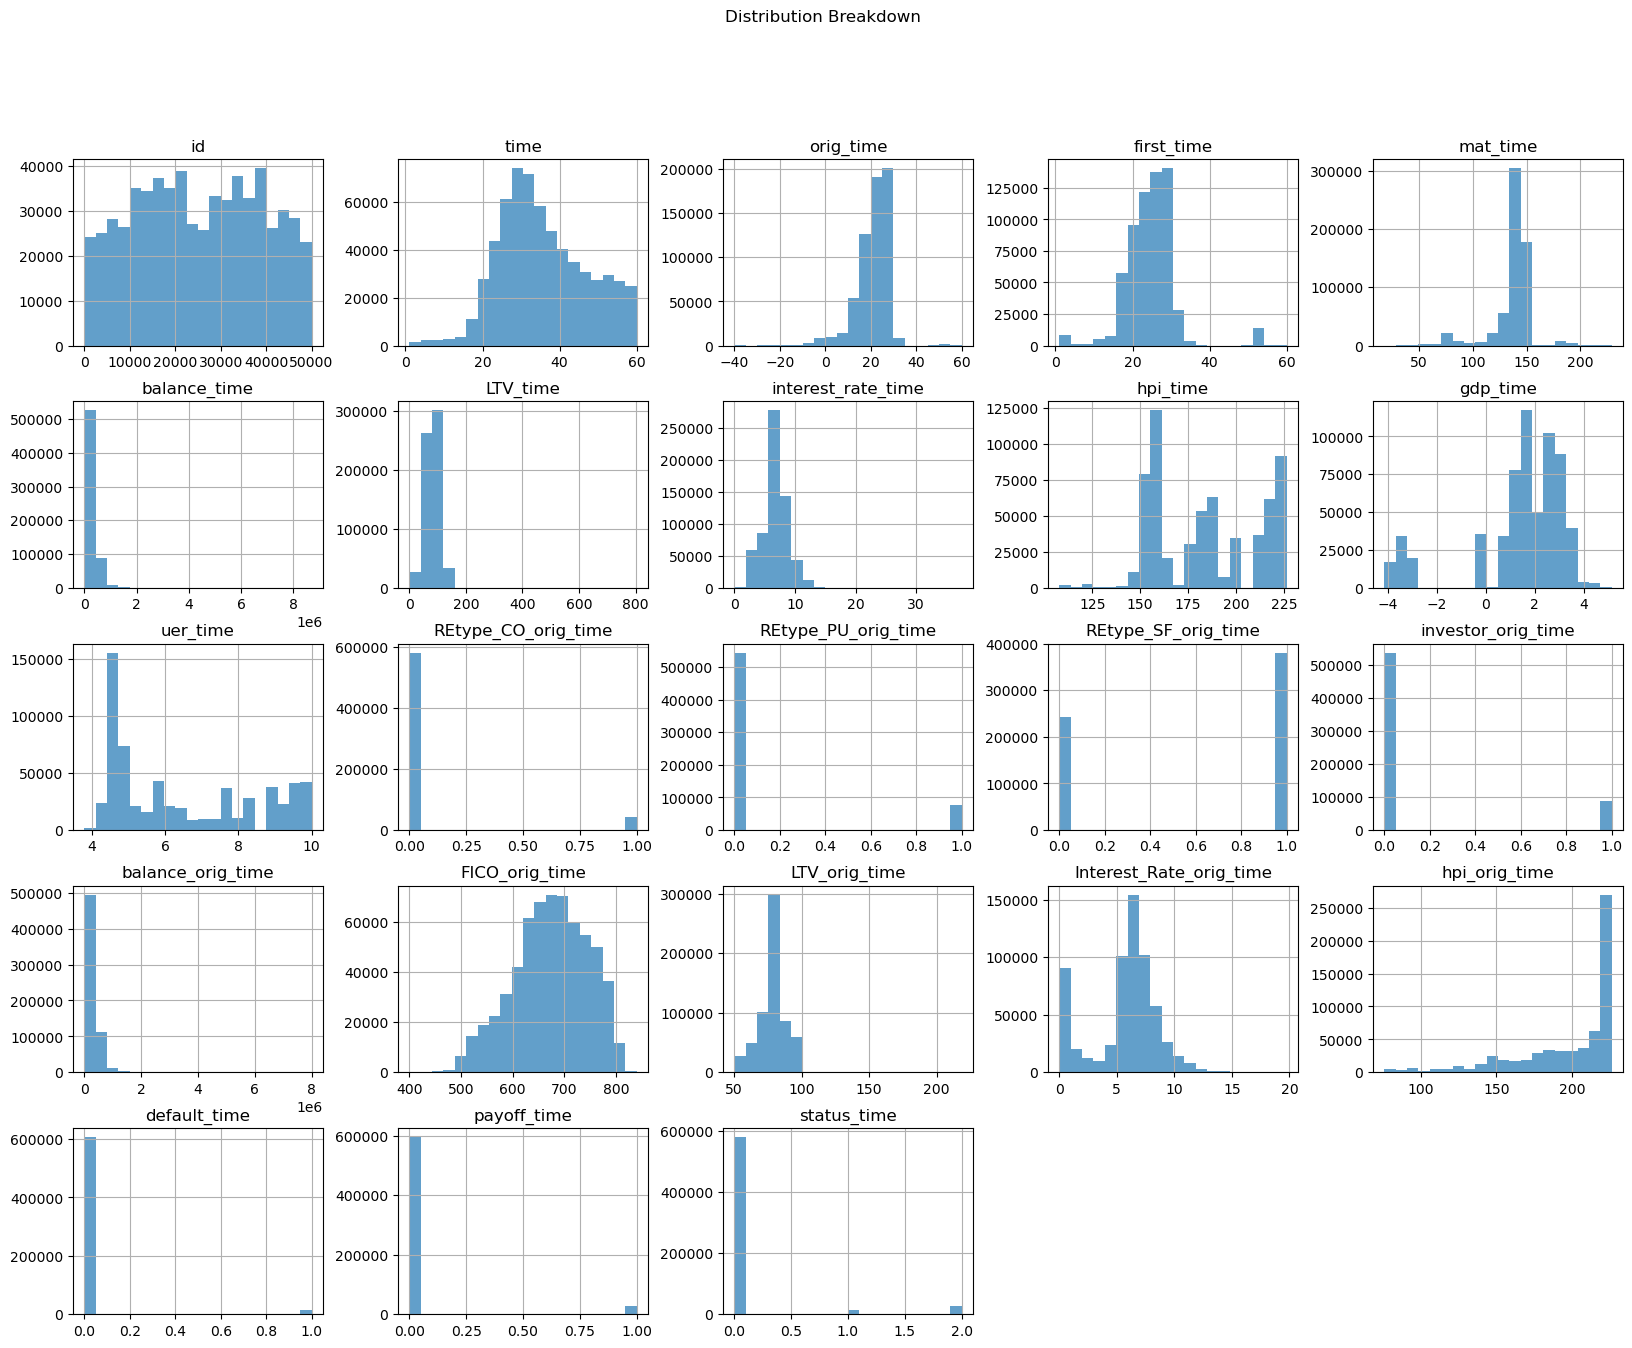

In [13]:
df.hist(bins=20, figsize=(20, 15), alpha=0.7)
plt.suptitle('Distribution Breakdown', x=0.5, y=0.98)
plt.show()

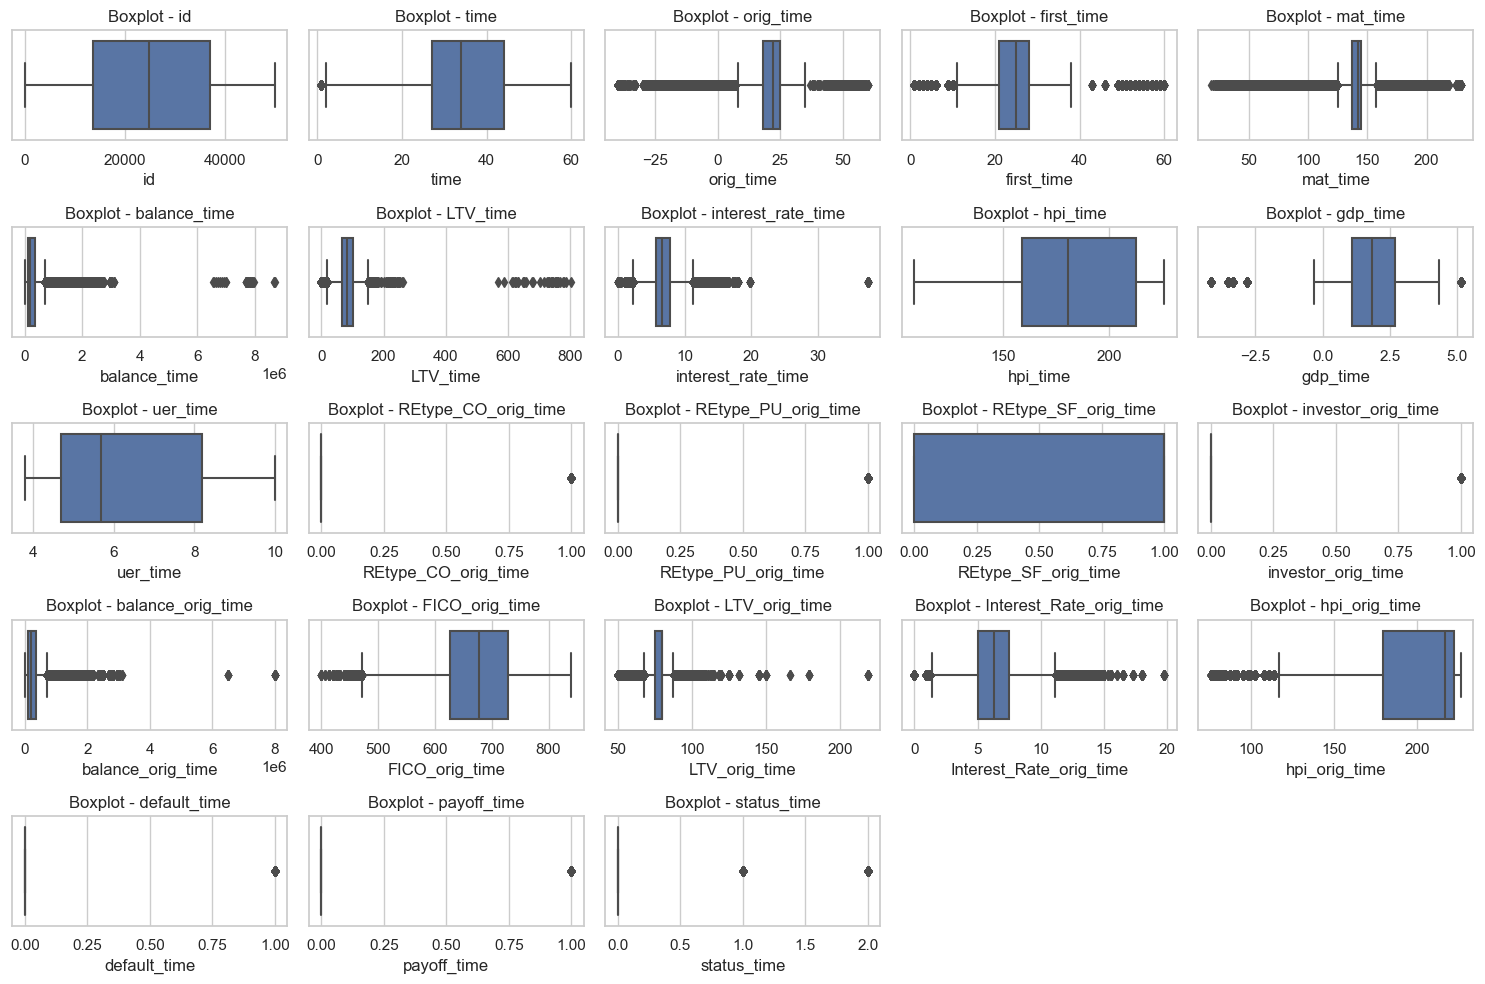

In [15]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

for i, column in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot - {column}')

plt.tight_layout()
plt.show()

In [16]:
def remove_outliers(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    
    return feature[(feature >= lower) & (feature <= upper)]

In [17]:
numeric_features = ['balance_time', 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'balance_orig_time'
                   ,'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time']

In [18]:
df[numeric_features] = df[numeric_features].apply(remove_outliers)

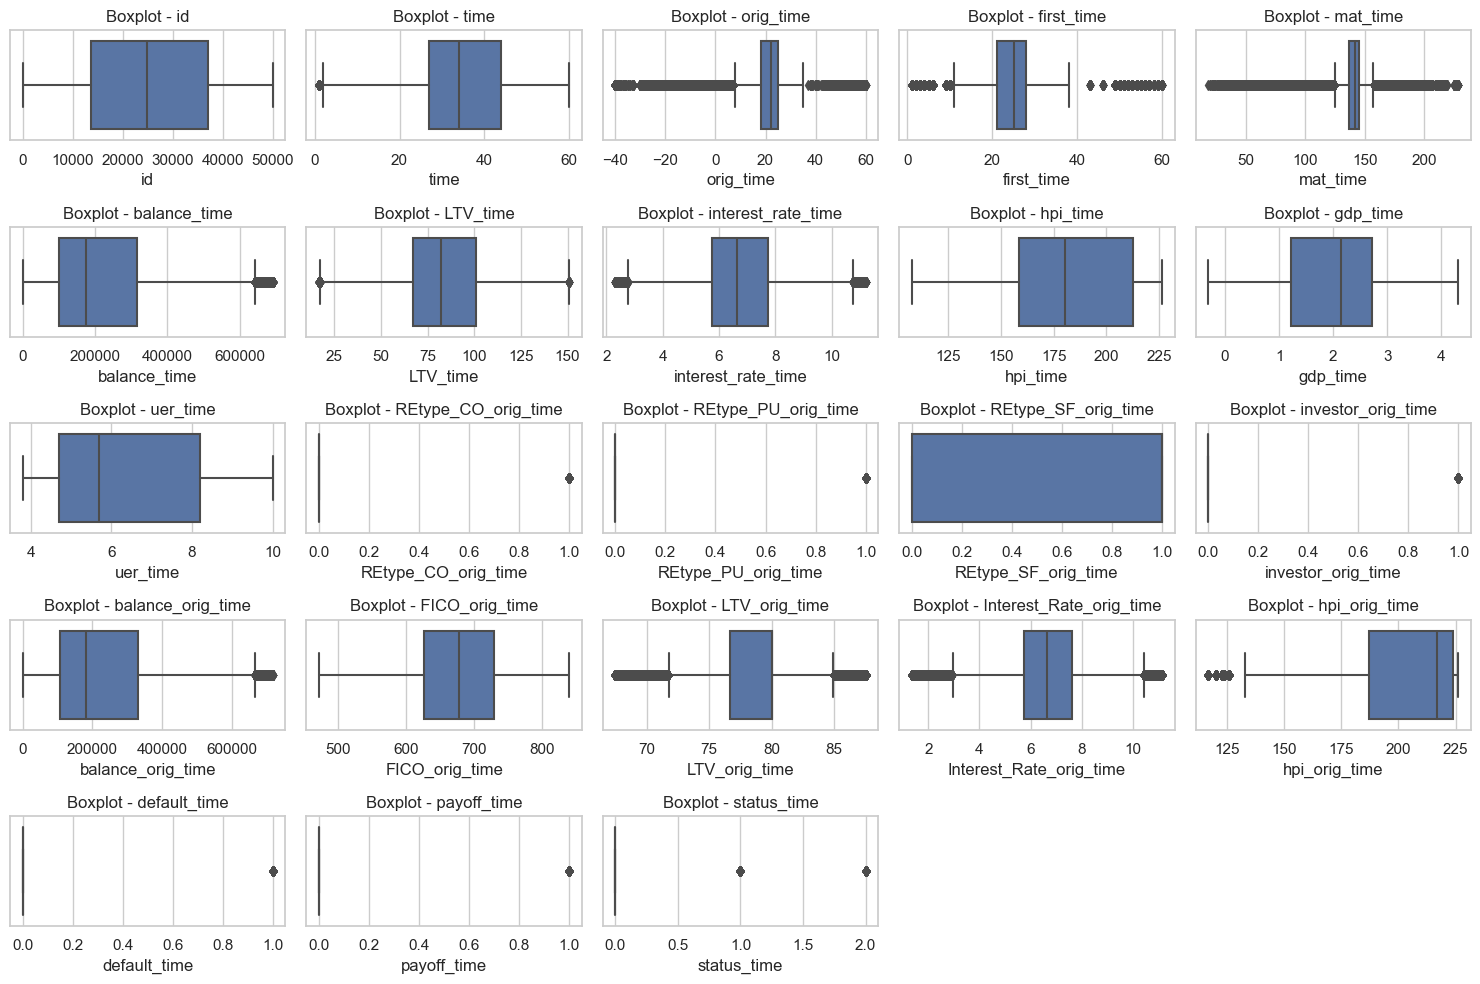

In [19]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

for i, column in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot - {column}')

plt.tight_layout()
plt.show()

### 1.1 Feature Engineering

#### The code below creates a function to transform features into Weight of Evidence features

In [20]:
def woe_binning(df, feature, target, bins = 5):
    #woe_df = pd.DataFrame(columns=['Bin', 'Event', 'Non-Event', 'Total', 'Event Rate', 'Non-Event Rate', 'WoE'])
    bin_no = []
    event = []
    non_event = []
    total = []
    event_rate_list = []
    non_event_rate_list = []
    woe_list = []
    iv_list = []
    
    total_event = df[target].sum()
    total_non_event = df.shape[0] - total_event

    bins_cut = pd.cut(df[feature], bins=bins, precision=2)
    
    for bin_label, group in df.groupby(bins_cut):
        event_count = group[target].sum()
        non_event_count = group.shape[0] - event_count

        event_rate = (event_count + 1) / (total_event + 2)
        non_event_rate = (non_event_count + 1) / (total_non_event + 2)

        woe = (np.log(event_rate / non_event_rate))
        
        iv = (event_rate - non_event_rate) * woe

        bin_no.append(str(bin_label))
        event.append(event_count)
        non_event.append(non_event_count)
        total.append(event_count + non_event_count)
        event_rate_list.append(event_rate)
        non_event_rate_list.append(non_event_rate)
        woe_list.append(woe)
        iv_list.append(iv)
        
    
    if bins == 4:
        woe_df = pd.DataFrame(
                {'Variable': feature,
                 'Group': [1,2,3,4],
                'Bin': bin_no, 
                'Event': event,
                'Non_Event': non_event,
                'Total': total,
                'Event Rate': event_rate_list,
                'Non-Event Rate': non_event_rate_list,
                'WoE': woe_list,
                'IV': iv_list 
                })
    else:        
                woe_df = pd.DataFrame(
                {'Variable': feature,
                 'Group': [1,2],
                'Bin': bin_no, 
                'Event': event,
                'Non_Event': non_event,
                'Total': total,
                'Event Rate': event_rate_list,
                'Non-Event Rate': non_event_rate_list,
                'WoE': woe_list,
                'IV': iv_list  
                })

    return woe_df

#### The following section transform the default variable into the correct format....borrower default in the next 12 months

In [21]:
unique_ids = list(pd.unique(df.id))

In [22]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715.0,69.4,9.2,NaN,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715.0,69.4,9.2,NaN,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715.0,69.4,9.2,NaN,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715.0,69.4,9.2,NaN,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715.0,69.4,9.2,NaN,0,0,0


In [23]:
time_range = range(1, 61)

In [24]:
full_time_series = (df.groupby(['id', 'time'])
                   .mean()
                   .reindex(pd.MultiIndex.from_product([unique_ids, range(1, 61)], names=['id', 'time']), fill_value=0)
                   .reset_index())

In [27]:
full_time_series['dec_ind'] = full_time_series['time'].isin([12, 24, 36, 48, 60]).astype(int)

In [28]:
full_time_series['def_ind'] = full_time_series.groupby(['id', (full_time_series['time'] - 1) // 12])['default_time'].transform('max')

In [29]:
full_time_series['default_n12m'] = (full_time_series['def_ind'] == 1).astype(int)

In [30]:
full_time_series['scope_ind'] = np.where((full_time_series['dec_ind'] == 1) &
                                         (full_time_series['balance_time'] > 0),1,0)

In [31]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [32]:
scope_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
35,1,36,-7.0,25.0,113.0,32688.30,28.963629,9.20,151.48,NaN,...,69.4,9.2,NaN,0.0,0.0,0.0,1,0.0,0,1
47,1,48,-7.0,25.0,113.0,29087.21,26.658065,9.20,146.45,2.715903,...,69.4,9.2,NaN,1.0,0.0,1.0,1,1.0,1,1
215,4,36,-2.0,25.0,119.0,59222.20,49.156858,10.50,151.48,NaN,...,81.8,10.5,NaN,0.0,0.0,0.0,1,0.0,0,1
227,4,48,-2.0,25.0,119.0,56462.50,48.475869,9.25,146.45,2.715903,...,81.8,10.5,NaN,0.0,0.0,0.0,1,0.0,0,1
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.50,189.82,2.836358,...,81.8,10.5,NaN,0.0,0.0,0.0,1,0.0,0,1


In [33]:
scope_df.shape

(51746, 27)

#### Continuous variables

In [35]:
numeric_features = ['balance_time', 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'balance_orig_time'
                   ,'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time']

In [36]:
binary_variables = ['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time']

In [37]:
data = full_time_series[full_time_series.balance_time > 0]

In [38]:
print('The shape of the mortgage dataset after removing outliers is:', data.shape)

The shape of the mortgage dataset after removing outliers is: (601463, 27)


#### The code below displays the correlations for the features in the mortgages dataset for the reason that some variables may be required to be dropped from the Logistic Regression model due to multicollinearity reasons

In [39]:
features = sum([numeric_features,binary_variables],[])

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
balance_time,1.000000,0.146556,-0.309605,0.006577,-0.050708,0.018252,0.984249,0.319329,-0.073160,-0.309669,0.168796,-0.001950,0.110575,-0.047003,-0.167985
LTV_time,0.146556,1.000000,0.006706,-0.466177,-0.289117,0.456438,0.098398,0.030152,0.230372,0.061990,0.645244,0.036310,0.071678,-0.024360,-0.034688
interest_rate_time,-0.309605,0.006706,1.000000,0.082424,-0.061854,-0.190041,-0.329123,-0.448424,0.099651,0.738424,0.020019,-0.068339,-0.119039,0.073449,0.002352
hpi_time,0.006577,-0.466177,0.082424,1.000000,0.291148,-0.809671,-0.007047,-0.015042,0.012896,-0.028264,-0.120341,-0.001649,-0.002809,-0.019258,-0.013435
gdp_time,-0.050708,-0.289117,-0.061854,0.291148,1.000000,-0.153043,-0.050134,-0.034312,-0.006277,-0.041399,-0.298789,-0.015062,-0.015493,0.004389,-0.007197
uer_time,0.018252,0.456438,-0.190041,-0.809671,-0.153043,1.000000,0.033429,0.065207,-0.015756,-0.055534,0.130012,0.006592,0.011231,-0.007098,0.021893
balance_orig_time,0.984249,0.098398,-0.329123,-0.007047,-0.050134,0.033429,1.000000,0.332406,-0.082975,-0.325497,0.142046,-0.003819,0.107761,-0.045310,-0.170014
FICO_orig_time,0.319329,0.030152,-0.448424,-0.015042,-0.034312,0.065207,0.332406,1.000000,-0.082249,-0.380223,0.048270,0.093721,0.125961,-0.140497,0.188510
LTV_orig_time,-0.073160,0.230372,0.099651,0.012896,-0.006277,-0.015756,-0.082975,-0.082249,1.000000,0.104853,0.056582,0.010657,0.023029,-0.015721,-0.102549
Interest_Rate_orig_time,-0.309669,0.061990,0.738424,-0.028264,-0.041399,-0.055534,-0.325497,-0.380223,0.104853,1.000000,0.079550,-0.053050,-0.098755,0.040613,0.012419


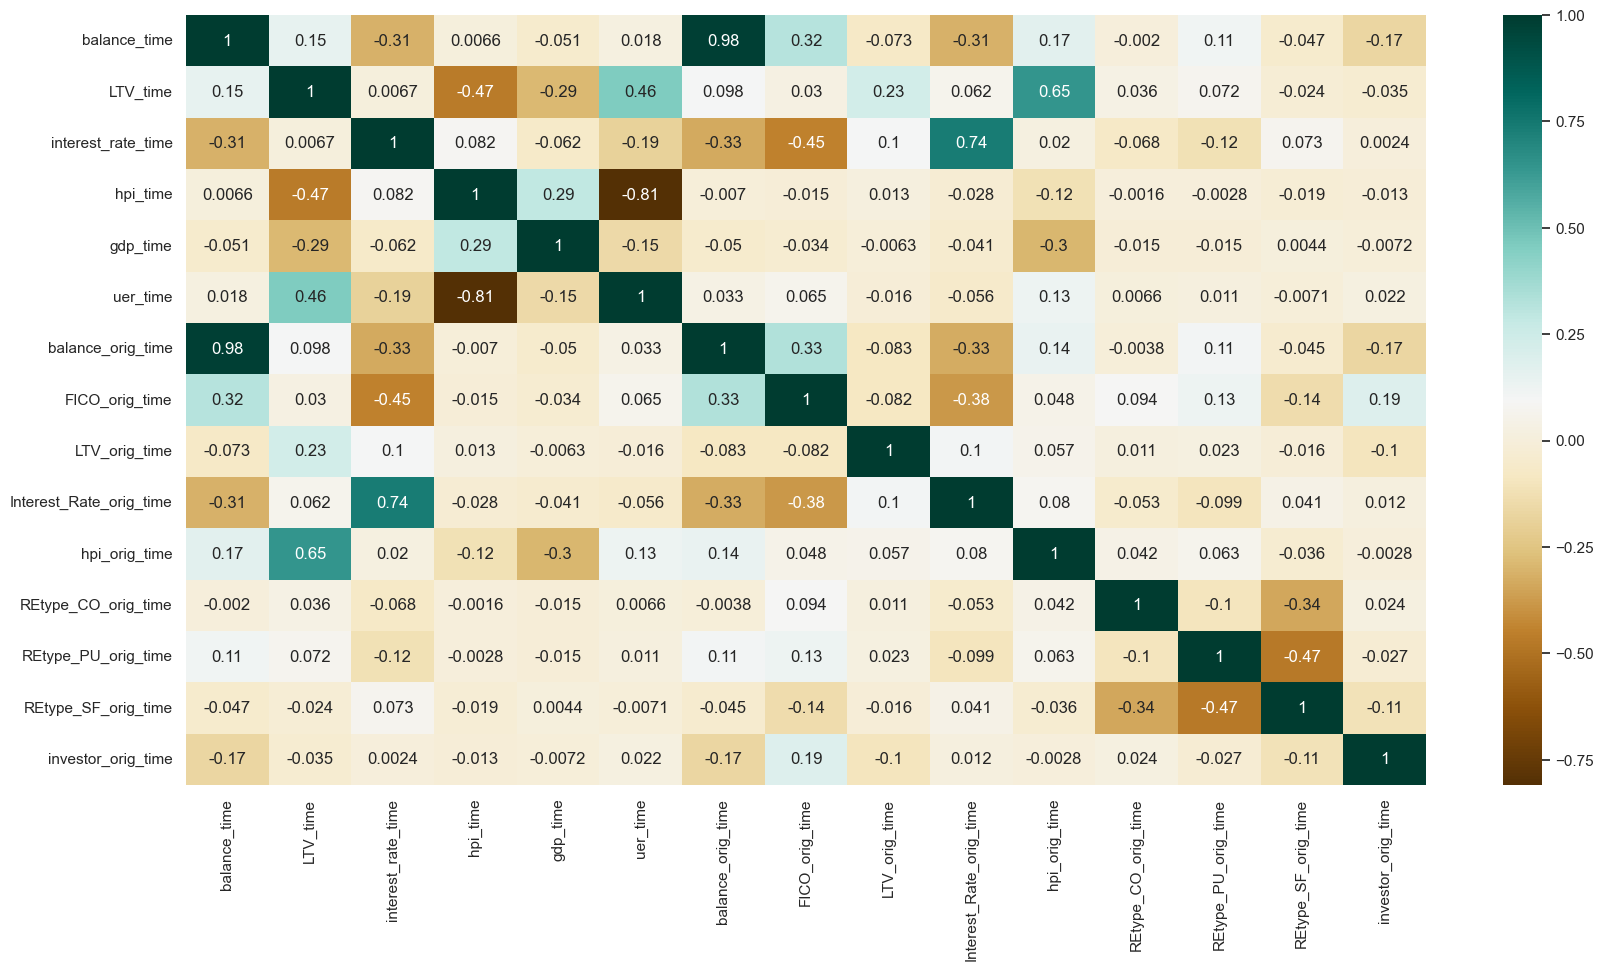

In [41]:
plt.figure(figsize=(20,10))
c= data[features].corr()
plot = sns.heatmap(c,cmap="BrBG",annot=True)
c

In [42]:
upper = c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
highly_correlated_pairs = (abs(upper) > .4).stack()

In [43]:
result = pd.DataFrame(highly_correlated_pairs[highly_correlated_pairs])
result = result.reset_index()
result.columns = ['Variable1', 'Variable2', 'Correlation']

In [44]:
print(result)

             Variable1                Variable2  Correlation
0         balance_time        balance_orig_time         True
1             LTV_time                 hpi_time         True
2             LTV_time                 uer_time         True
3             LTV_time            hpi_orig_time         True
4   interest_rate_time           FICO_orig_time         True
5   interest_rate_time  Interest_Rate_orig_time         True
6             hpi_time                 uer_time         True
7  REtype_PU_orig_time      REtype_SF_orig_time         True


#### Applying the woe_binning function on the features of the mortgages dataset

In [46]:
woe_result_balance = woe_binning(scope_df, 'balance_time', 'default_n12m', bins=4)
woe_result_ltv=woe_binning(scope_df, 'LTV_time','default_n12m', bins = 4)
woe_result_interest = woe_binning(scope_df, 'interest_rate_time','default_n12m', bins = 4)
woe_result_hpi=woe_binning(scope_df, 'hpi_time', 'default_n12m', bins=4)
woe_result_gdp=woe_binning(scope_df, 'gdp_time', 'default_n12m', bins=4)
woe_result_uer=woe_binning(scope_df, 'uer_time', 'default_n12m', bins=4)
woe_result_balance_orig_time = woe_binning(scope_df, 'balance_orig_time', 'default_n12m', bins=4)
woe_result_FICO_orig_time = woe_binning(scope_df, 'FICO_orig_time', 'default_n12m', bins=4)
woe_result_LTV_orig_time = woe_binning(scope_df, 'LTV_orig_time', 'default_n12m', bins=4)
woe_result_Interest_Rate_orig_time = woe_binning(scope_df, 'Interest_Rate_orig_time', 'default_n12m', bins=4)
woe_result_hpi_orig_time = woe_binning(scope_df, 'hpi_orig_time', 'default_n12m', bins=4)

In [47]:
woe_df = pd.concat([woe_result_balance
,woe_result_ltv
,woe_result_interest
,woe_result_hpi
,woe_result_gdp
,woe_result_uer
,woe_result_balance_orig_time
,woe_result_FICO_orig_time
,woe_result_LTV_orig_time
,woe_result_Interest_Rate_orig_time
,woe_result_hpi_orig_time
], ignore_index=True)
woe_df.head()

,Variable,Group,Bin,Event,Non_Event,Total,Event Rate,Non-Event Rate,WoE,IV
0,balance_time,1,"(-305.88, 172953.68]",561,25471,26032,0.422239,0.505206,-0.179396,1.488400e-02
1,balance_time,2,"(172953.68, 345522.95]",472,14125,14597,0.355372,0.280172,0.237761,1.787954e-02
2,balance_time,3,"(345522.95, 518092.22]",213,7631,7844,0.160781,0.151372,0.060308,5.674932e-04
3,balance_time,4,"(518092.22, 690661.5]",83,3190,3273,0.063110,0.063290,-0.002835,5.080525e-07
4,LTV_time,1,"(16.76, 50.4]",40,4675,4715,0.030804,0.092743,-1.102189,6.826837e-02


#### Binary Variables

In [48]:
binary_variables = ['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time']

In [49]:
woe_result_REtype_CO_orig_time = woe_binning(scope_df, 'REtype_CO_orig_time', 'default_n12m', bins=2)
woe_result_REtype_PU_orig_time = woe_binning(scope_df, 'REtype_PU_orig_time', 'default_n12m', bins=2)
woe_result_REtype_SF_orig_time = woe_binning(scope_df, 'REtype_SF_orig_time', 'default_n12m', bins=2)
woe_result_investor_orig_time = woe_binning(scope_df, 'investor_orig_time', 'default_n12m', bins=2)

In [50]:
woe_df_full = pd.concat([woe_df,
                        woe_result_REtype_CO_orig_time,
                        woe_result_REtype_PU_orig_time,
                        woe_result_REtype_SF_orig_time,
                        woe_result_investor_orig_time], ignore_index=True)
woe_df_full.tail()

,Variable,Group,Bin,Event,Non_Event,Total,Event Rate,Non-Event Rate,WoE,IV
47,REtype_PU_orig_time,2,"(0.5, 1.0]",164,6181,6345,0.123967,0.122613,0.010986,0.000015
48,REtype_SF_orig_time,1,"(-0.001, 0.5]",507,20017,20524,0.381668,0.397033,-0.039468,0.000606
49,REtype_SF_orig_time,2,"(0.5, 1.0]",822,30400,31222,0.618332,0.602967,0.025163,0.000387
50,investor_orig_time,1,"(-0.001, 0.5]",1163,43261,44424,0.874530,0.858050,0.019025,0.000314
51,investor_orig_time,2,"(0.5, 1.0]",166,7156,7322,0.125470,0.141950,-0.123415,0.002034


In [51]:
woe_df_full.head()

,Variable,Group,Bin,Event,Non_Event,Total,Event Rate,Non-Event Rate,WoE,IV
0,balance_time,1,"(-305.88, 172953.68]",561,25471,26032,0.422239,0.505206,-0.179396,1.488400e-02
1,balance_time,2,"(172953.68, 345522.95]",472,14125,14597,0.355372,0.280172,0.237761,1.787954e-02
2,balance_time,3,"(345522.95, 518092.22]",213,7631,7844,0.160781,0.151372,0.060308,5.674932e-04
3,balance_time,4,"(518092.22, 690661.5]",83,3190,3273,0.063110,0.063290,-0.002835,5.080525e-07
4,LTV_time,1,"(16.76, 50.4]",40,4675,4715,0.030804,0.092743,-1.102189,6.826837e-02
5,LTV_time,2,"(50.4, 83.89]",235,20985,21220,0.177310,0.416232,-0.853341,2.038818e-01
6,LTV_time,3,"(83.89, 117.39]",508,16591,17099,0.382419,0.329082,0.150210,8.011723e-03
7,LTV_time,4,"(117.39, 150.89]",538,7652,8190,0.404959,0.151788,0.981300,2.484364e-01
8,interest_rate_time,1,"(2.31, 4.54]",61,5581,5642,0.046582,0.110712,-0.865730,5.551991e-02
9,interest_rate_time,2,"(4.54, 6.76]",420,22399,22819,0.316304,0.444277,-0.339746,4.347844e-02


In [52]:
iv_results = woe_df_full.groupby('Variable')['IV'].sum().reset_index()
sorted_df = iv_results.sort_values(by='IV', ascending=False)

In [53]:
sorted_df

,Variable,IV
3,LTV_time,0.528598
11,hpi_time,0.445470
14,uer_time,0.412104
9,gdp_time,0.290950
10,hpi_orig_time,0.203564
1,Interest_Rate_orig_time,0.200207
12,interest_rate_time,0.183584
0,FICO_orig_time,0.101578
8,balance_time,0.033332
7,balance_orig_time,0.026887


In [54]:
input_string = woe_df_full['Bin']

In [55]:
lower_bound = []
for x in range(len(input_string)):
    test = input_string[x]
    start_index = test.find('(')
    end_index = test.find(',')
    if start_index != -1 and end_index != -1:
        features_string = test[start_index + 1:end_index].strip()
        features_list = features_string.split(', ')
        lower_bound.append(features_list)
    else:
        lower_bound.append("NA")

In [57]:
lower_bound_float = []

for x in range(len(lower_bound)):
    lower_bound_float.append(float(lower_bound[x][0]))

In [58]:
upper_bound = []
for x in range(len(input_string)):
    test = input_string[x]
    start_index = test.find(',')
    end_index = test.find(']')
    if start_index != -1 and end_index != -1:
        features_string = test[start_index + 1:end_index].strip()
        features_list = features_string.split(', ')
        upper_bound.append(features_list)
    else:
        upper_bound.append("NA")

In [60]:
upper_bound_float = []

for x in range(len(upper_bound)):
    upper_bound_float.append(float(upper_bound[x][0]))

In [61]:
woe_df_full['lower_bound'] = lower_bound_float
woe_df_full['upper_bound'] = upper_bound_float

In [62]:
woe_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variable        52 non-null     object 
 1   Group           52 non-null     int64  
 2   Bin             52 non-null     object 
 3   Event           52 non-null     int64  
 4   Non_Event       52 non-null     int64  
 5   Total           52 non-null     int64  
 6   Event Rate      52 non-null     float64
 7   Non-Event Rate  52 non-null     float64
 8   WoE             52 non-null     float64
 9   IV              52 non-null     float64
 10  lower_bound     52 non-null     float64
 11  upper_bound     52 non-null     float64
dtypes: float64(6), int64(4), object(2)
memory usage: 5.0+ KB


In [352]:
woe_df_full.head()

,Variable,Group,Bin,Event,Non_Event,Total,Event Rate,Non-Event Rate,WoE,IV,lower_bound,upper_bound
0,balance_time,1,"(-305.88, 172953.68]",561,25471,26032,0.422239,0.505206,-0.179396,1.488400e-02,-305.88,172953.68
1,balance_time,2,"(172953.68, 345522.95]",472,14125,14597,0.355372,0.280172,0.237761,1.787954e-02,172953.68,345522.95
2,balance_time,3,"(345522.95, 518092.22]",213,7631,7844,0.160781,0.151372,0.060308,5.674932e-04,345522.95,518092.22
3,balance_time,4,"(518092.22, 690661.5]",83,3190,3273,0.063110,0.063290,-0.002835,5.080525e-07,518092.22,690661.50
4,LTV_time,1,"(16.76, 50.4]",40,4675,4715,0.030804,0.092743,-1.102189,6.826837e-02,16.76,50.40


In [353]:
woe_df_to_apply = woe_df_full[['Variable', 'Group', 'WoE', 'lower_bound', 'upper_bound']]
woe_df_to_apply.head()

,Variable,Group,WoE,lower_bound,upper_bound
0,balance_time,1,-0.179396,-305.88,172953.68
1,balance_time,2,0.237761,172953.68,345522.95
2,balance_time,3,0.060308,345522.95,518092.22
3,balance_time,4,-0.002835,518092.22,690661.50
4,LTV_time,1,-1.102189,16.76,50.40


In [66]:
index_df = full_time_series[['id', 'time', 'default_time', 'default_n12m', 'scope_ind']]

In [67]:
def woe_apply(input_df, woe_map, feature):
    # Extract the relevant WOE mapping for the given feature
    feat_woe_map = woe_map[woe_map['Variable'] == feature][['lower_bound', 'upper_bound', 'WoE']]
    lower_bounds = feat_woe_map['lower_bound'].values
    upper_bounds = feat_woe_map['upper_bound'].values
    woe_values = feat_woe_map['WoE'].values

    # Extract NumPy arrays from the DataFrame
    numbers = input_df[feature].values
    
    # Find the corresponding WOE value for each number
    matched_rows = (numbers[:, None] > lower_bounds) & (numbers[:, None] <= upper_bounds)
    woe_vals = []
    for x in range(len(matched_rows)):
        if np.size(matched_rows[x]) == 0:
            woe_vals.append(0)
        else:
            woe_vals.append(woe_values[matched_rows[x]])

    woe_values = [item for arr in woe_vals for item in (arr if arr.size > 0 else [arr])]
    #input_df[woe_column_name] = np.where(matched_rows.any(axis=1), matched_woe_values[:, 0], np.nan)

    return woe_values

#### Binary Variables

In [68]:
REtype_CO_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'REtype_CO_orig_time') 
REtype_PU_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'REtype_PU_orig_time')
REtype_SF_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'REtype_SF_orig_time')
investor_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'investor_orig_time')

#### Continuous Variables

In [69]:
balance_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'balance_time') 
LTV_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'LTV_time')
interest_rate_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'interest_rate_time')
hpi_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'hpi_time')
gdp_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'gdp_time')
uer_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'uer_time')
balance_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'balance_orig_time')
FICO_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'FICO_orig_time')
LTV_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'LTV_orig_time')
Interest_Rate_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'Interest_Rate_orig_time')
hpi_orig_time = woe_apply(input_df = full_time_series, woe_map = woe_df_to_apply, feature = 'hpi_orig_time')

#### Create Modelling Dataset for Logistic Regression

In [71]:
len(full_time_series)

3000000

In [72]:
index_df['REtype_CO_orig_time'] = REtype_CO_orig_time
index_df['REtype_PU_orig_time'] = REtype_PU_orig_time
index_df['REtype_SF_orig_time'] = REtype_SF_orig_time
index_df['investor_orig_time'] = investor_orig_time
index_df['balance_time'] = balance_time
index_df['LTV_time'] = LTV_time
index_df['interest_rate_time'] = interest_rate_time
index_df['hpi_time'] = hpi_time
index_df['gdp_time'] = gdp_time
index_df['uer_time'] = uer_time
index_df['balance_orig_time'] = balance_orig_time
index_df['FICO_orig_time'] = FICO_orig_time
index_df['LTV_orig_time'] = LTV_orig_time
index_df['Interest_Rate_orig_time'] = Interest_Rate_orig_time
index_df['hpi_orig_time'] = hpi_orig_time

In [73]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       int64  
 1   time                     int64  
 2   default_time             float64
 3   default_n12m             int32  
 4   scope_ind                int32  
 5   REtype_CO_orig_time      float64
 6   REtype_PU_orig_time      float64
 7   REtype_SF_orig_time      float64
 8   investor_orig_time       float64
 9   balance_time             object 
 10  LTV_time                 object 
 11  interest_rate_time       object 
 12  hpi_time                 object 
 13  gdp_time                 object 
 14  uer_time                 object 
 15  balance_orig_time        object 
 16  FICO_orig_time           object 
 17  LTV_orig_time            object 
 18  Interest_Rate_orig_time  object 
 19  hpi_orig_time            object 
dtypes: float64(5), int32(2), int64(2), object(11)


In [74]:
balance = []
ltv = []
interest_rate = []
gdp = []
fico = []
bal = []
ltv_orig = []
ir = []
hpi = []

In [75]:
for x in range(len(index_df['balance_time'])):
    if np.size(index_df['balance_time'][x]) == 0:
        balance.append(0)
    else:
        balance.append(index_df['balance_time'][x])
    
for x in range(len(index_df['LTV_time'])):
    if np.size(index_df['LTV_time'][x]) == 0:
        ltv.append(0)
    else:
        ltv.append(index_df['LTV_time'][x])
    
for x in range(len(index_df['interest_rate_time'])):
    if np.size(index_df['interest_rate_time'][x]) == 0:
        interest_rate.append(0)
    else:
        interest_rate.append(index_df['interest_rate_time'][x])
    
for x in range(len(index_df['gdp_time'])):
    if np.size(index_df['gdp_time'][x]) == 0:
        gdp.append(0)
    else:
        gdp.append(index_df['gdp_time'][x])
    
for x in range(len(index_df['FICO_orig_time'])):
    if np.size(index_df['FICO_orig_time'][x]) == 0:
        fico.append(0)
    else:
        fico.append(index_df['FICO_orig_time'][x])
    
for x in range(len(index_df['balance_orig_time'])):
    if np.size(index_df['balance_orig_time'][x]) == 0:
        bal.append(0)
    else:
        bal.append(index_df['balance_orig_time'][x])
    
for x in range(len(index_df['LTV_orig_time'])):
    if np.size(index_df['LTV_orig_time'][x]) == 0:
        ltv_orig.append(0)
    else:
        ltv_orig.append(index_df['LTV_orig_time'][x])
    
for x in range(len(index_df['Interest_Rate_orig_time'])):
    if np.size(index_df['Interest_Rate_orig_time'][x]) == 0:
        ir.append(0)
    else:
        ir.append(index_df['Interest_Rate_orig_time'][x])
    
for x in range(len(index_df['hpi_orig_time'])):
    if np.size(index_df['hpi_orig_time'][x]) == 0:
        hpi.append(0)
    else:
        hpi.append(index_df['hpi_orig_time'][x])

In [76]:
index_df['balance_time'] = balance
index_df['LTV_time'] = ltv
index_df['interest_rate_time'] = interest_rate
index_df['gdp_time'] = gdp
index_df['balance_orig_time'] = bal
index_df['FICO_orig_time'] = fico
index_df['LTV_orig_time'] = ltv_orig
index_df['Interest_Rate_orig_time'] = ir
index_df['hpi_orig_time'] = hpi

In [77]:
index_df.head()

,id,time,default_time,default_n12m,scope_ind,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,1,1,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,-0.179396,0.0,0.0,[],0.0,[],-0.132799,0.0,0.0,0.0,0.0
1,1,2,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,-0.179396,0.0,0.0,[],0.0,[],-0.132799,0.0,0.0,0.0,0.0
2,1,3,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,-0.179396,0.0,0.0,[],0.0,[],-0.132799,0.0,0.0,0.0,0.0
3,1,4,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,-0.179396,0.0,0.0,[],0.0,[],-0.132799,0.0,0.0,0.0,0.0
4,1,5,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,-0.179396,0.0,0.0,[],0.0,[],-0.132799,0.0,0.0,0.0,0.0


In [78]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       int64  
 1   time                     int64  
 2   default_time             float64
 3   default_n12m             int32  
 4   scope_ind                int32  
 5   REtype_CO_orig_time      float64
 6   REtype_PU_orig_time      float64
 7   REtype_SF_orig_time      float64
 8   investor_orig_time       float64
 9   balance_time             float64
 10  LTV_time                 float64
 11  interest_rate_time       float64
 12  hpi_time                 object 
 13  gdp_time                 float64
 14  uer_time                 object 
 15  balance_orig_time        float64
 16  FICO_orig_time           float64
 17  LTV_orig_time            float64
 18  Interest_Rate_orig_time  float64
 19  hpi_orig_time            float64
dtypes: float64(14), int32(2), int64(2), object(2)


In [79]:
hpi_ind = []
uer_ind = []

In [80]:
for x in range(len(index_df['hpi_time'])):
    if np.size(index_df['hpi_time'][x]) == 0:
        hpi_ind.append(0)
    else:
        hpi_ind.append(index_df['hpi_time'][x])
        
for x in range(len(index_df['uer_time'])):
    if np.size(index_df['uer_time'][x]) == 0:
        uer_ind.append(0)
    else:
        uer_ind.append(index_df['uer_time'][x])

In [81]:
index_df['hpi_time'] = hpi_ind
index_df['uer_time'] = uer_ind

### 2. Model Development

#### The following section develops the advanced machine learning methods to be explored 

### Logistic Regression

In [311]:
scope_df = index_df[index_df.scope_ind == 1]

In [312]:
scope_df.head()

,id,time,default_time,default_n12m,scope_ind,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
35,1,36,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,0.000000,0.446673,-0.132799,-0.030768,-0.288031,0.45258,0.0
47,1,48,1.0,1,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,-0.110058,0.446673,-0.132799,-0.030768,-0.288031,0.45258,0.0
215,4,36,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,0.000000,0.446673,-0.132799,0.238216,0.106437,0.45258,0.0
227,4,48,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,-0.110058,0.446673,-0.132799,0.238216,0.106437,0.45258,0.0
239,4,60,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,-1.532554,-0.987448,-1.196615,-0.132799,0.238216,0.106437,0.45258,0.0


In [313]:
X = scope_df.drop('default_n12m',axis=1)
y = scope_df['default_n12m']

In [314]:
X_train, X_test, y_train, y_test_logistic = train_test_split(X, y, test_size=0.3, random_state=42)

In [315]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35319
1    17659
Name: count, dtype: int64

In [316]:
X_train = X_resampled.iloc[:,4:]
X_test = X_test.iloc[:,4:]

In [317]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [318]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545865
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52962
Method:                           MLE   Df Model:                           15
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1424
Time:                        17:21:17   Log-Likelihood:                -28919.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5840      0.017    -34.116      0.000      -0.618   

In [319]:
X_train = X_train.drop('balance_orig_time',axis=1)

In [320]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545930
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52963
Method:                           MLE   Df Model:                           14
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1423
Time:                        17:21:17   Log-Likelihood:                -28922.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5846      0.017    -34.156      0.000      -0.618   

In [321]:
X_train = X_train.drop('uer_time',axis=1)

In [322]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545978
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52964
Method:                           MLE   Df Model:                           13
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1422
Time:                        17:21:18   Log-Likelihood:                -28925.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6122      0.012    -50.741      0.000      -0.636   

In [323]:
X_train = X_train.drop('REtype_PU_orig_time',axis=1)

In [324]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.546105
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52965
Method:                           MLE   Df Model:                           12
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1420
Time:                        17:21:18   Log-Likelihood:                -28932.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6123      0.012    -50.757      0.000      -0.636   

In [325]:
X_train = X_train.drop('Interest_Rate_orig_time',axis=1)

In [326]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.548058
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52966
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1390
Time:                        17:21:19   Log-Likelihood:                -29035.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6371      0.012    -53.354      0.000      -0.661      -0.614
RE

In [327]:
X_train = X_train.drop('LTV_time',axis=1)

In [328]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.556506
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52967
Method:                           MLE   Df Model:                           10
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1257
Time:                        17:21:20   Log-Likelihood:                -29483.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7044      0.012    -60.047      0.000      -0.727      -0.681
RE

In [329]:
X_train_log = X_train.drop('FICO_orig_time',axis=1)

In [330]:
# Create a logistic regression model
log_model = sm.Logit(y_resampled, X_train_log)

# Fit the model
result = log_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.565296
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52968
Method:                           MLE   Df Model:                            9
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.1119
Time:                        17:21:22   Log-Likelihood:                -29948.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7040      0.012    -60.677      0.000      -0.727      -0.681
RE

,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,balance_time,interest_rate_time,hpi_time,gdp_time,LTV_orig_time,hpi_orig_time
REtype_CO_orig_time,1.000000,-0.333279,0.021734,0.000513,-0.073272,-0.013778,0.005934,0.004490,0.042796
REtype_SF_orig_time,-0.333279,1.000000,-0.107557,-0.043960,0.066264,-0.024645,-0.054382,-0.012552,-0.035236
investor_orig_time,0.021734,-0.107557,1.000000,-0.167250,0.003760,-0.020241,0.007065,-0.082860,-0.000869
balance_time,0.000513,-0.043960,-0.167250,1.000000,-0.313411,-0.049149,0.050956,-0.068700,0.167302
interest_rate_time,-0.073272,0.066264,0.003760,-0.313411,1.000000,-0.023987,-0.038159,0.079564,-0.050324
hpi_time,-0.013778,-0.024645,-0.020241,-0.049149,-0.023987,1.000000,0.630059,0.005680,-0.242412
gdp_time,0.005934,-0.054382,0.007065,0.050956,-0.038159,0.630059,1.000000,-0.005074,0.045250
LTV_orig_time,0.004490,-0.012552,-0.082860,-0.068700,0.079564,0.005680,-0.005074,1.000000,0.036676
hpi_orig_time,0.042796,-0.035236,-0.000869,0.167302,-0.050324,-0.242412,0.045250,0.036676,1.000000


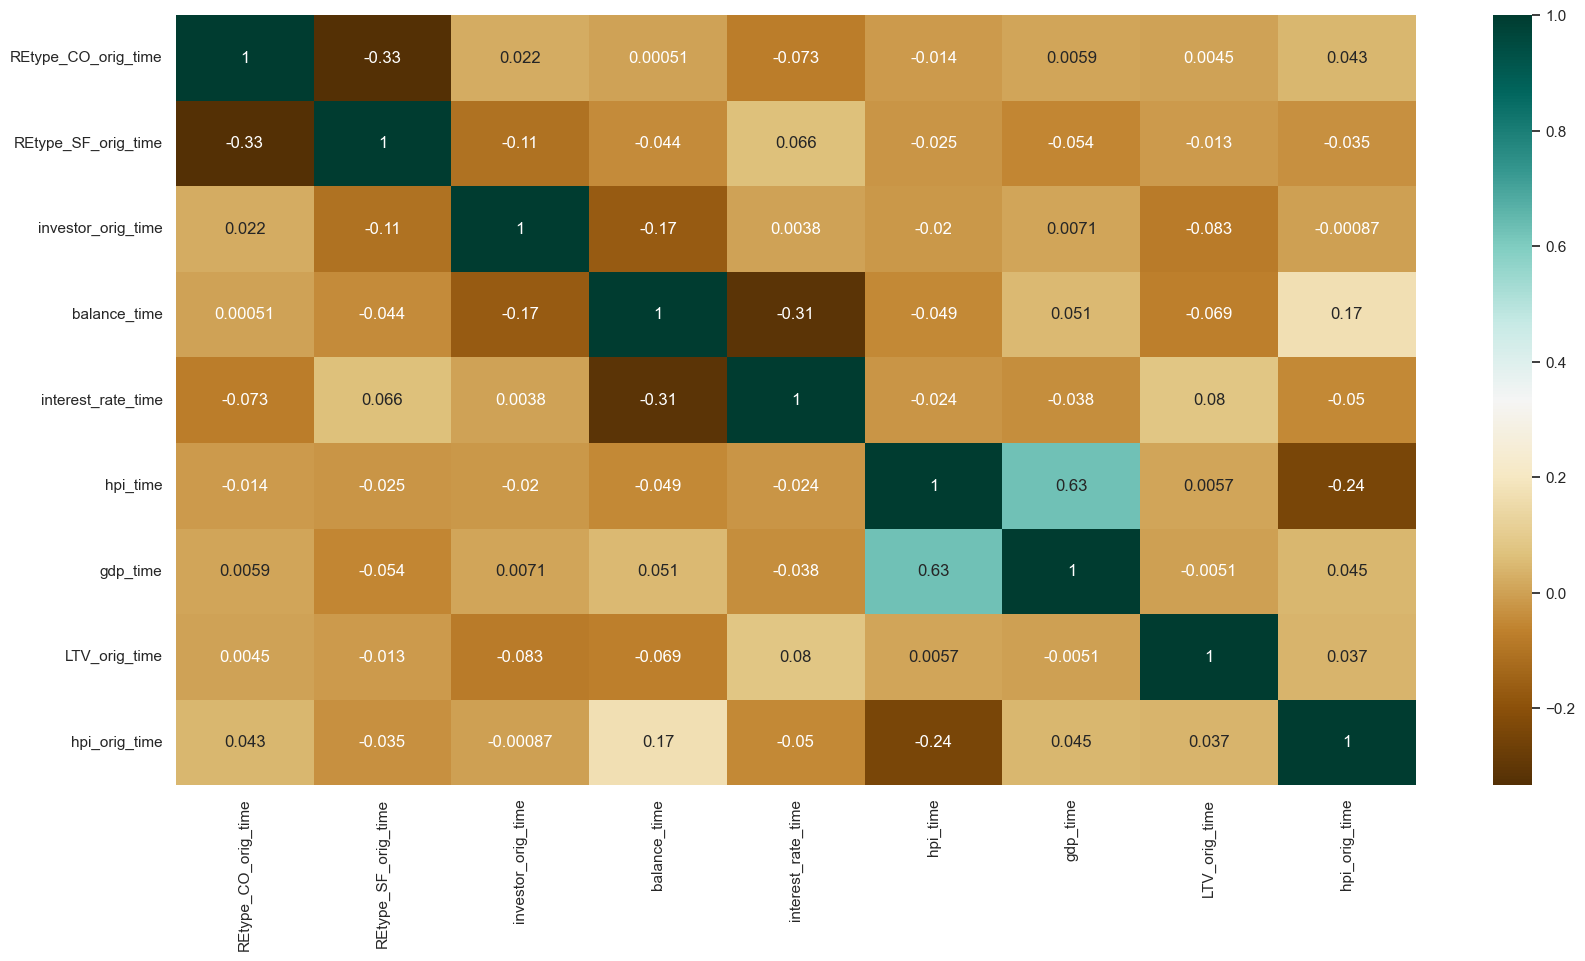

In [331]:
plt.figure(figsize=(20,10))
c= data[X_train_log.columns[1:]].corr()
plot = sns.heatmap(c,cmap="BrBG",annot=True)
c

In [332]:
X_test = X_test.drop(['LTV_time', 'balance_orig_time', 'REtype_PU_orig_time', 'Interest_Rate_orig_time', 'uer_time', 
                      'FICO_orig_time', 'LTV_time'], 
                     axis = 1)

In [333]:
logistic_preds = result.predict(X_test)

In [334]:
y_hat_logistic = (logistic_preds > 0.5).astype(int)

In [335]:
conf_matrix = confusion_matrix(y_test_logistic, y_hat_logistic)

In [336]:
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        13005         2093
Actual 1          270          156


In [337]:
accuracy = accuracy_score(y_test_logistic, y_hat_logistic)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.8477840762690029


### Decision Tree

In [115]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [116]:
scope_df = scope_df.fillna(scope_df.mean())

In [117]:
features = sum([numeric_features,binary_variables],[])

In [119]:
scope_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
35,1,36,-7.0,25.0,113.0,32688.30,28.963629,9.20,151.48,2.895760,...,69.4,9.2,201.141826,0.0,0.0,0.0,1,0.0,0,1
47,1,48,-7.0,25.0,113.0,29087.21,26.658065,9.20,146.45,2.715903,...,69.4,9.2,201.141826,1.0,0.0,1.0,1,1.0,1,1
215,4,36,-2.0,25.0,119.0,59222.20,49.156858,10.50,151.48,2.895760,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
227,4,48,-2.0,25.0,119.0,56462.50,48.475869,9.25,146.45,2.715903,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.50,189.82,2.836358,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [120]:
X = scope_df[features]
y = scope_df['default_n12m']

In [121]:
X_train, X_test, y_train, y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [122]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35307
1    17653
Name: count, dtype: int64

In [123]:
sc = StandardScaler()
X_train = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

In [124]:
classifier = DecisionTreeClassifier()

In [146]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

In [150]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [151]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [152]:
best_tree_classifier = grid_search.best_estimator_
y_pred = best_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test_dt, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.8883664004122649


In [155]:
tree_rules = export_text(best_tree_classifier, feature_names=list(features))
print(tree_rules)

|--- LTV_time <= 0.32
|   |--- FICO_orig_time <= -0.84
|   |   |--- gdp_time <= -0.10
|   |   |   |--- LTV_time <= -1.17
|   |   |   |   |--- hpi_orig_time <= -3.09
|   |   |   |   |   |--- balance_orig_time <= -1.24
|   |   |   |   |   |   |--- LTV_time <= -1.35
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- LTV_time >  -1.35
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- balance_orig_time >  -1.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- hpi_orig_time >  -3.09
|   |   |   |   |   |--- class: 0
|   |   |   |--- LTV_time >  -1.17
|   |   |   |   |--- balance_time <= -0.02
|   |   |   |   |   |--- LTV_time <= -1.14
|   |   |   |   |   |   |--- FICO_orig_time <= -1.51
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- FICO_orig_time >  -1.51
|   |   |   |   |   |   |   |--- FICO_orig_time <= -1.12
|   |   |   |   |   |   |   |   |--- balance_time <= -0.85
|   |   |   |   |   |   |   |   |   |--- class: 1
| 

In [125]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=5,min_samples_leaf=1,random_state=42)

dt_model.fit(X_train, y_resampled)

y_pred_dt = dt_model.predict(X_test)

In [126]:
accuracy = accuracy_score(y_test_dt, y_pred_dt)

In [127]:
accuracy

0.8872069054367431

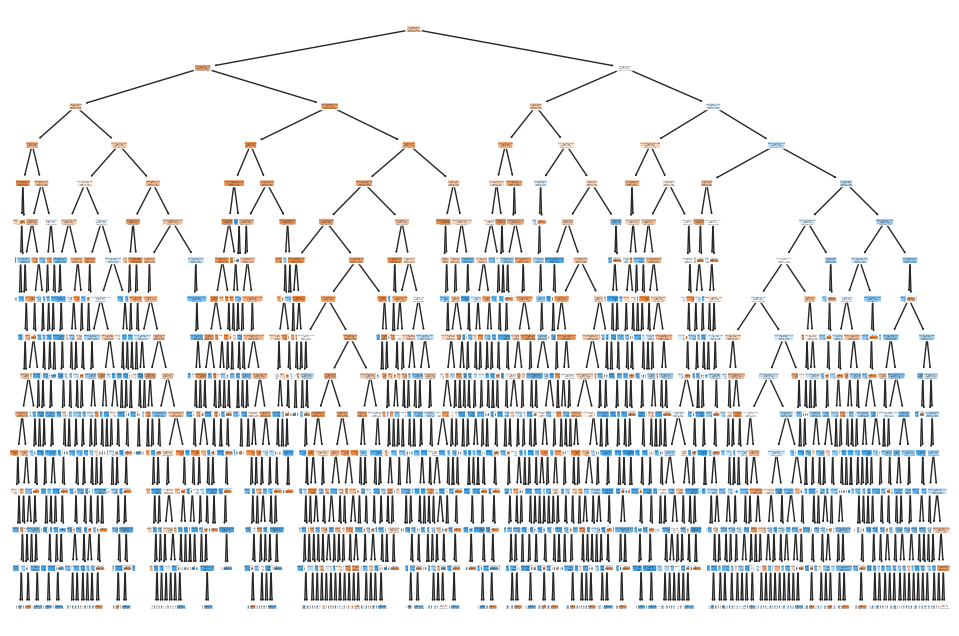

In [130]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=list(features), rounded=True)
plt.show()

In [133]:
imp = dt_model.feature_importances_
feature_names = list(features)

feat_imps_dt = np.argsort(imp)[::-1]

In [134]:
print("Feature Importance Scores:")
for feature, importance in zip(features, imp):
    print(f"{feature}: {importance}")

Feature Importance Scores:
balance_time: 0.0933335515342322
LTV_time: 0.31651173901877516
interest_rate_time: 0.09726706888232461
hpi_time: 0.0027473216563358373
gdp_time: 0.035486296217577644
uer_time: 0.007150590105415378
balance_orig_time: 0.0651579878708862
FICO_orig_time: 0.15333981040531708
LTV_orig_time: 0.06135426043296064
Interest_Rate_orig_time: 0.07292473150468717
hpi_orig_time: 0.060887985911590524
REtype_CO_orig_time: 0.00843277686227414
REtype_PU_orig_time: 0.006872220196503471
REtype_SF_orig_time: 0.013570864219930983
investor_orig_time: 0.004962795181189261


### Support Vector Machine

In [136]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [137]:
scope_df = scope_df.fillna(scope_df.mean())

In [138]:
X = scope_df[features]
y = scope_df['default_n12m']

X_train, X_test, y_train, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=52)

In [139]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35287
1    17643
Name: count, dtype: int64

In [140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.fit_transform(X_test)

In [141]:
X_train

array([[-0.19727782,  0.45765865, -0.13102838, ..., -0.3705748 ,
        -1.24912507, -0.39622023],
       [-0.24985475, -0.15945588, -2.38701663, ..., -0.3705748 ,
        -1.24912507,  2.52384893],
       [-0.53853713, -0.48296542, -0.16887836, ...,  2.69851052,
        -1.24912507,  2.52384893],
       ...,
       [-0.76873365, -0.59976651, -0.66974829, ..., -0.3705748 ,
         0.80057623, -0.39622023],
       [ 0.51825343,  0.98229525,  0.60389239, ..., -0.3705748 ,
         0.80057623, -0.39622023],
       [-0.37502534, -0.05134795, -1.87756035, ..., -0.3705748 ,
         0.80057623, -0.39622023]])

In [166]:
svm_classifier = svm.SVC()

param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [168]:
grid_search = RandomizedSearchCV(svm_classifier, param_distributions=param_grid, n_iter=5, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_resampled)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [169]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


In [170]:
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test_svm, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.8044962638495233


In [171]:
support_vectors = best_svm_classifier.support_vectors_

print("Number of support vectors:", len(support_vectors))

Number of support vectors: 26047


In [142]:
svm_model = svm.SVC(kernel='rbf', gamma='auto', C=10)

svm_model.fit(X_train, y_resampled)

y_pred_svm = svm_model.predict(X_test)

In [143]:
accuracy = accuracy_score(y_test_svm, y_pred_svm)

In [144]:
accuracy

0.8044962638495233

### Random Forest

In [146]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [147]:
scope_df = scope_df.fillna(scope_df.mean())

In [148]:
data = scope_df

In [149]:
X = data[features]
y = data['default_n12m']

In [150]:
X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=142)

In [151]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35286
1    17643
Name: count, dtype: int64

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.fit_transform(X_test)

In [183]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [184]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [185]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [186]:
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test_rf, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.9628317443957742


In [153]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_split=2,min_samples_leaf=1,random_state=42)

In [154]:
rf_model.fit(X_train, y_resampled)

y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test_rf,y_pred_rf)

In [161]:
imp = rf_model.feature_importances_
feature_names = features

feat_imps_rf = np.argsort(imp)[::-1]

In [162]:
for i in range(len(imp)):
    print(f"{features[feat_imps_rf[i]]}: {imp[feat_imps_rf[i]]}")

LTV_time: 0.18170501658528423
FICO_orig_time: 0.11853256273499048
balance_time: 0.11361717823101662
interest_rate_time: 0.10829043360003801
balance_orig_time: 0.10368118636941279
Interest_Rate_orig_time: 0.0920770673362973
hpi_orig_time: 0.08278372625912399
hpi_time: 0.048769047225530014
LTV_orig_time: 0.04829128032801739
uer_time: 0.043337377336472915
gdp_time: 0.020078402650627124
REtype_SF_orig_time: 0.014263544708139335
investor_orig_time: 0.009942699861674153
REtype_PU_orig_time: 0.00798794226843823
REtype_CO_orig_time: 0.006642534504937362


### Artificial Neural Network

In [256]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [257]:
scope_df = scope_df.fillna(scope_df.mean())

In [258]:
data = scope_df

In [259]:
X = data[features]
y = data['default_n12m']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [260]:
X_train, X_test, y_train, y_test_nn = train_test_split(X, y, test_size=0.3, random_state=88)

In [261]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35281
1    17640
Name: count, dtype: int64

In [262]:
def create_model(optimizer='adam', units=10, activation='relu'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model 

In [206]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [207]:
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__units': [10, 20],
    'model__activation': ['relu', 'sigmoid']
}

In [208]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

In [211]:
grid_result = grid.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [212]:
best_params = grid_result.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'batch_size': 16, 'epochs': 20, 'model__activation': 'relu', 'model__optimizer': 'adam', 'model__units': 20}


In [213]:
y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test_nn, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

Accuracy on Test Set: 83.68%


In [214]:
best_model = grid_result.best_estimator_

In [263]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [264]:
model.fit(X_resampled, y_resampled, epochs=20, batch_size=16, validation_data=(X_test, y_test_nn))

Epoch 1/20
3308/3308 [==============================] - 5s 1ms/step - loss: 0.5502 - accuracy: 0.7045 - val_loss: 0.3855 - val_accuracy: 0.8349
Epoch 2/20
3308/3308 [==============================] - 5s 1ms/step - loss: 0.5161 - accuracy: 0.7365 - val_loss: 0.3365 - val_accuracy: 0.8679
Epoch 3/20
3308/3308 [==============================] - 5s 1ms/step - loss: 0.5098 - accuracy: 0.7380 - val_loss: 0.4054 - val_accuracy: 0.8044
Epoch 4/20
3308/3308 [==============================] - 5s 2ms/step - loss: 0.5065 - accuracy: 0.7397 - val_loss: 0.3525 - val_accuracy: 0.8512
Epoch 5/20
3308/3308 [==============================] - 5s 1ms/step - loss: 0.5041 - accuracy: 0.7430 - val_loss: 0.3601 - val_accuracy: 0.8393
Epoch 6/20
3308/3308 [==============================] - 5s 1ms/step - loss: 0.5023 - accuracy: 0.7431 - val_loss: 0.3486 - val_accuracy: 0.8498
Epoch 7/20
3308/3308 [==============================] - 5s 2ms/step - loss: 0.5010 - accuracy: 0.7443 - val_loss: 0.3824 - val_accuracy:

In [265]:
y_pred_proba = model.predict(X_test)
y_pred_nn = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test_nn, y_pred_nn)

486/486 [==============================] - 1s 935us/step


In [266]:
accuracy

0.8419866013913939

In [176]:
masker = shap.maskers.Independent(data=X_train)
explainer = shap.Explainer(model, masker=masker)
shap_values_nn = explainer.shap_values(X_test)

PermutationExplainer explainer: 15525it [02:58, 83.94it/s]                            


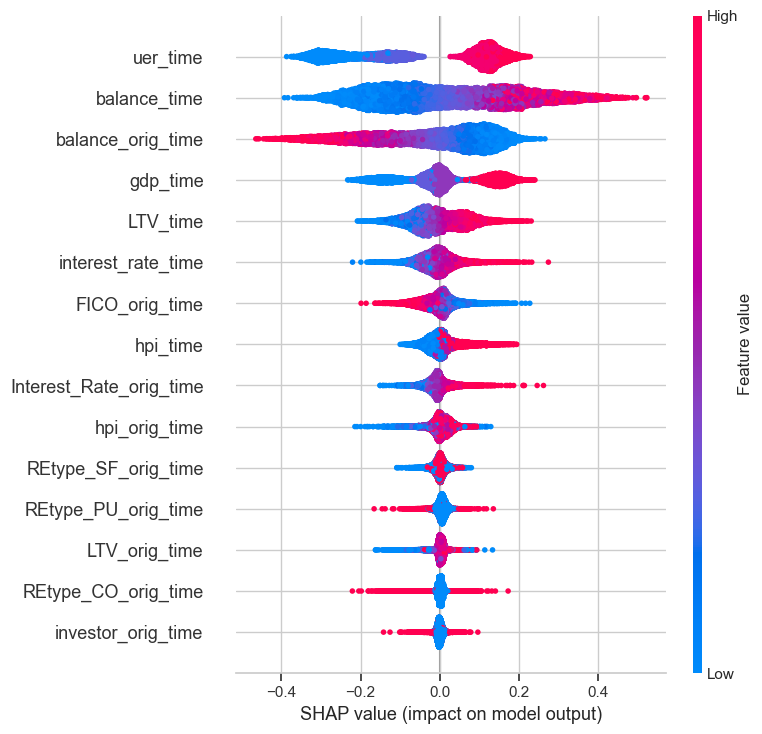

In [178]:
shap.summary_plot(shap_values_nn, X_test, feature_names=features)

### XGBoost

In [180]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [181]:
scope_df = scope_df.fillna(scope_df.mean())

In [182]:
scope_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
35,1,36,-7.0,25.0,113.0,32688.30,28.963629,9.20,151.48,2.895760,...,69.4,9.2,201.141826,0.0,0.0,0.0,1,0.0,0,1
47,1,48,-7.0,25.0,113.0,29087.21,26.658065,9.20,146.45,2.715903,...,69.4,9.2,201.141826,1.0,0.0,1.0,1,1.0,1,1
215,4,36,-2.0,25.0,119.0,59222.20,49.156858,10.50,151.48,2.895760,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
227,4,48,-2.0,25.0,119.0,56462.50,48.475869,9.25,146.45,2.715903,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.50,189.82,2.836358,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [183]:
X = scope_df[features]
y = scope_df['default_n12m']

In [184]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
35,32688.30,28.963629,9.200,151.48,2.895760,7.8,45000.0,715.0,69.400000,9.20000,201.141826,0.0,0.0,1.0,0.0
47,29087.21,26.658065,9.200,146.45,2.715903,8.3,45000.0,715.0,69.400000,9.20000,201.141826,0.0,0.0,1.0,0.0
215,59222.20,49.156858,10.500,151.48,2.895760,7.8,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
227,56462.50,48.475869,9.250,146.45,2.715903,8.3,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
239,52686.35,34.898842,10.500,189.82,2.836358,5.7,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999759,62630.97,51.916531,3.250,189.82,2.836358,5.7,82000.0,688.0,71.900000,1.62500,179.450000,0.0,0.0,0.0,1.0
2999819,347558.19,74.355912,2.750,189.82,2.836358,5.7,331417.0,692.0,75.000000,6.55975,179.450000,0.0,0.0,0.0,0.0
2999879,143676.16,71.896413,3.000,189.82,2.836358,5.7,166250.0,750.0,78.455612,2.25000,179.450000,0.0,0.0,0.0,0.0
2999939,259349.31,42.640152,2.745,189.82,2.836358,5.7,345000.0,779.0,78.455612,1.75000,179.450000,1.0,0.0,0.0,0.0


In [185]:
X_train, X_test, y_train, y_test_xgb = train_test_split(X, y, test_size=0.3, random_state=67)

In [186]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35265
1    17632
Name: count, dtype: int64

In [187]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.fit_transform(X_test)

In [188]:
len(X_train)

52897

In [189]:
xgb_model = xgb.XGBClassifier()

In [980]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [981]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_resampled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [982]:
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [983]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test_xgb, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9706


In [190]:
xgb_model = xgb.XGBClassifier(max_depth=7,learning_rate=0.2,n_estimators=200, colsample_bytree= 1, gamma = 0,subsample=0.8,
                              random_state=42)

In [191]:
xgb_model.fit(X_train, y_resampled)

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_pred_proba > 0.5).astype(int)

In [192]:
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
accuracy

0.9695310486987889

In [209]:
imp = xgb_model.feature_importances_
feature_names = features

feat_imps_xgb = np.argsort(imp)[::-1]

In [210]:
for i in range(len(imp)):
    print(f"{features[feat_imps_xgb[i]]}: {imp[feat_imps_xgb[i]]}")

gdp_time: 0.21815237402915955
LTV_time: 0.08812317252159119
uer_time: 0.07875291258096695
FICO_orig_time: 0.058457404375076294
interest_rate_time: 0.0547591894865036
hpi_orig_time: 0.054004915058612823
balance_orig_time: 0.053372807800769806
LTV_orig_time: 0.05269840359687805
REtype_PU_orig_time: 0.05249113216996193
Interest_Rate_orig_time: 0.05242256820201874
balance_time: 0.05229243263602257
hpi_time: 0.05001357942819595
REtype_CO_orig_time: 0.04962215945124626
investor_orig_time: 0.046476803719997406
REtype_SF_orig_time: 0.03836008161306381


### 3. Model Performance Testing

#### This section features the model performance testing methodology, confusion matrices, ROC curve, AUC etc.

#### Confusion Matrices

In [194]:
# Logistic
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_hat_logistic)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix_logistic, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        13005         2093
Actual 1          270          156


In [195]:
true_positive = conf_matrix_logistic[1, 1]
false_positive = conf_matrix_logistic[0, 1]
false_negative = conf_matrix_logistic[1, 0]
true_negative = conf_matrix_logistic[0, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(y_test_logistic)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.06936416184971098
Recall: 0.36619718309859156
Accuracy: 0.8477840762690029


In [196]:
# Decision Tree
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix_dt, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        13655         1455
Actual 1          296          118


In [197]:
true_positive = conf_matrix_dt[1, 1]
false_positive = conf_matrix_dt[0, 1]
false_negative = conf_matrix_dt[1, 0]
true_negative = conf_matrix_dt[0, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(y_test_dt)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.07501589319771138
Recall: 0.28502415458937197
Accuracy: 0.8872069054367431


In [198]:
# SVM
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix_svm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        12302         2828
Actual 1          207          187


In [199]:
true_positive = conf_matrix_svm[1, 1]
false_positive = conf_matrix_svm[0, 1]
false_negative = conf_matrix_svm[1, 0]
true_negative = conf_matrix_svm[0, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(y_test_svm)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.06202321724709784
Recall: 0.4746192893401015
Accuracy: 0.8044962638495233


In [200]:
# RF
conf_matrix_rf = confusion_matrix(y_test_rf,y_pred_rf)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        14963          168
Actual 1          378           15


In [201]:
true_positive = conf_matrix_rf[1, 1]
false_positive = conf_matrix_rf[0, 1]
false_negative = conf_matrix_rf[1, 0]
true_negative = conf_matrix_rf[0, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(y_test_rf)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.08196721311475409
Recall: 0.03816793893129771
Accuracy: 0.9648286524091729


In [202]:
# ANN
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix_nn, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        12584         2552
Actual 1          200          188


In [203]:
true_positive = conf_matrix_nn[1, 1]
false_positive = conf_matrix_nn[0, 1]
false_negative = conf_matrix_nn[1, 0]
true_negative = conf_matrix_nn[0, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(y_test_nn)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.06861313868613139
Recall: 0.4845360824742268
Accuracy: 0.8227261015202267


In [204]:
# XGBoost
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix_xgb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        15039          113
Actual 1          360           12


In [205]:
true_positive = conf_matrix_xgb[1, 1]
false_positive = conf_matrix_xgb[0, 1]
false_negative = conf_matrix_xgb[1, 0]
true_negative = conf_matrix_xgb[0, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
accuracy = (true_positive + true_negative) / len(y_test_xgb)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.096
Recall: 0.03225806451612903
Accuracy: 0.9695310486987889


#### ROC Curve

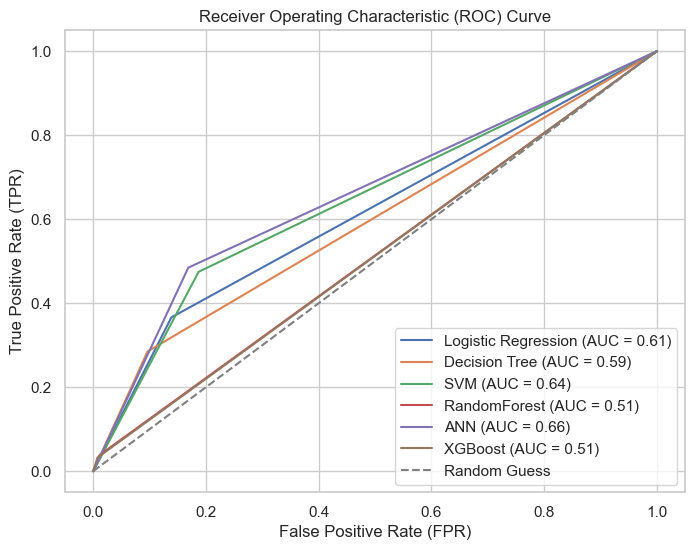

In [206]:
plt.figure(figsize=(8, 6))

fpr_log, tpr_log, _ = roc_curve(y_test_logistic, y_hat_logistic)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')

fpr_dt, tpr_dt, _ = roc_curve(y_test_dt, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

fpr_svm, tpr_svm, _ = roc_curve(y_test_svm, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test_rf,y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {roc_auc_rf:.2f})')

fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'ANN (AUC = {roc_auc_nn:.2f})')

fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [207]:
gini_coefficient_log = 2 * roc_auc_log - 1
gini_coefficient_dt = 2 * roc_auc_dt - 1
gini_coefficient_svm = 2 * roc_auc_svm - 1
gini_coefficient_rf = 2 * roc_auc_rf - 1
gini_coefficient_nn = 2 * roc_auc_nn - 1
gini_coefficient_xgb = 2 * roc_auc_xgb - 1

print("Gini Coefficient Logistic Regression:", gini_coefficient_log)
print("Gini Coefficient Decision Tree:", gini_coefficient_dt)
print("Gini Coefficient SVM:", gini_coefficient_svm)
print("Gini Coefficient Random Forest:", gini_coefficient_rf)
print("Gini Coefficient ANN:", gini_coefficient_nn)
print("Gini Coefficient XGBoost:", gini_coefficient_xgb)

Gini Coefficient Logistic Regression: 0.22756955029954518
Gini Coefficient Decision Tree: 0.18873030945370006
Gini Coefficient SVM: 0.28770587228788735
Gini Coefficient Random Forest: 0.027064905423928698
Gini Coefficient ANN: 0.3159314313114363
Gini Coefficient XGBoost: 0.02480030316449211


#### Feature Importances

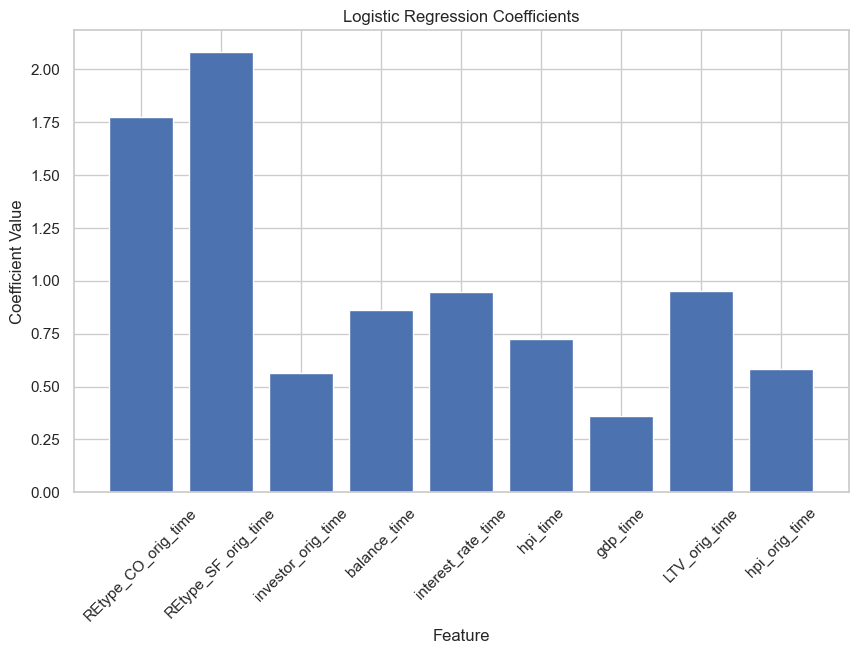

In [343]:
feature_names = X_train_log.columns[1:]  # Exclude the intercept term

plt.figure(figsize=(10, 6))
plt.bar(range(len(result.params[1:])), result.params[1:], align="center")
plt.xticks(range(len(result.params[1:])), feature_names, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Coefficients")
plt.show()

In [272]:
dt_imp = dt_model.feature_importances_
feature_names = list(features)

feat_imps_dt = np.argsort(dt_imp)[::-1]

In [273]:
print("Feature Importance Scores:")
for feature, importance in zip(features, dt_imp):
    print(f"{feature}: {importance}")

Feature Importance Scores:
balance_time: 0.0933335515342322
LTV_time: 0.31651173901877516
interest_rate_time: 0.09726706888232461
hpi_time: 0.0027473216563358373
gdp_time: 0.035486296217577644
uer_time: 0.007150590105415378
balance_orig_time: 0.0651579878708862
FICO_orig_time: 0.15333981040531708
LTV_orig_time: 0.06135426043296064
Interest_Rate_orig_time: 0.07292473150468717
hpi_orig_time: 0.060887985911590524
REtype_CO_orig_time: 0.00843277686227414
REtype_PU_orig_time: 0.006872220196503471
REtype_SF_orig_time: 0.013570864219930983
investor_orig_time: 0.004962795181189261


In [274]:
rf_imp = rf_model.feature_importances_
feature_names = features

feat_imps_rf = np.argsort(rf_imp)[::-1]

In [275]:
for i in range(len(imp)):
    print(f"{features[feat_imps_rf[i]]}: {rf_imp[feat_imps_rf[i]]}")

LTV_time: 0.18170501658528423
FICO_orig_time: 0.11853256273499048
balance_time: 0.11361717823101662
interest_rate_time: 0.10829043360003801
balance_orig_time: 0.10368118636941279
Interest_Rate_orig_time: 0.0920770673362973
hpi_orig_time: 0.08278372625912399
hpi_time: 0.048769047225530014
LTV_orig_time: 0.04829128032801739
uer_time: 0.043337377336472915
gdp_time: 0.020078402650627124
REtype_SF_orig_time: 0.014263544708139335
investor_orig_time: 0.009942699861674153
REtype_PU_orig_time: 0.00798794226843823
REtype_CO_orig_time: 0.006642534504937362


In [276]:
xgb_imp = xgb_model.feature_importances_
feature_names = features

feat_imps_xgb = np.argsort(xgb_imp)[::-1]

In [277]:
for i in range(len(imp)):
    print(f"{features[feat_imps_xgb[i]]}: {xgb_imp[feat_imps_xgb[i]]}")

gdp_time: 0.21815237402915955
LTV_time: 0.08812317252159119
uer_time: 0.07875291258096695
FICO_orig_time: 0.058457404375076294
interest_rate_time: 0.0547591894865036
hpi_orig_time: 0.054004915058612823
balance_orig_time: 0.053372807800769806
LTV_orig_time: 0.05269840359687805
REtype_PU_orig_time: 0.05249113216996193
Interest_Rate_orig_time: 0.05242256820201874
balance_time: 0.05229243263602257
hpi_time: 0.05001357942819595
REtype_CO_orig_time: 0.04962215945124626
investor_orig_time: 0.046476803719997406
REtype_SF_orig_time: 0.03836008161306381


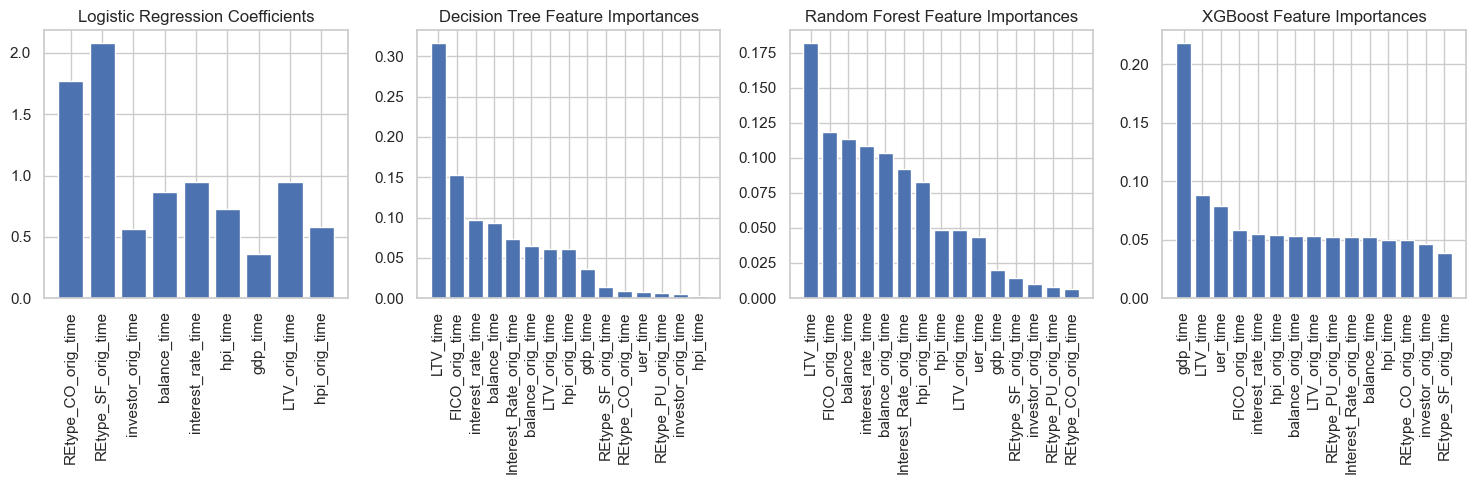

In [349]:
plt.figure(figsize=(15,5))

plt.subplot(1, 4,1)
plt.bar(range(len(result.params[1:])), result.params[1:], align="center")
plt.xticks(range(len(result.params[1:])), feature_names, rotation=90)
plt.title("Logistic Regression Coefficients")

plt.subplot(1, 4,2)
plt.bar(range(len(feat_imps_dt)), dt_imp[feat_imps_dt], align="center")
plt.xticks(range(len(feat_imps_dt)), [features[i] for i in feat_imps_dt], rotation=90)
plt.title("Decision Tree Feature Importances")

plt.subplot(1, 4,3)
plt.bar(range(len(feat_imps_rf)), rf_imp[feat_imps_rf], align="center")
plt.xticks(range(len(feat_imps_rf)), [features[i] for i in feat_imps_rf], rotation=90)
plt.title("Random Forest Feature Importances")

plt.subplot(1, 4,4)
plt.bar(range(len(feat_imps_xgb)), xgb_imp[feat_imps_xgb], align="center")
plt.xticks(range(len(feat_imps_xgb)), [features[i] for i in feat_imps_xgb], rotation=90)
plt.title("XGBoost Feature Importances")

plt.tight_layout()
plt.show()

In [267]:
masker = shap.maskers.Independent(data=X_train)
explainer = shap.Explainer(model, masker=masker)
shap_values_nn = explainer.shap_values(X_test)

PermutationExplainer explainer: 15525it [03:05, 77.83it/s]                            


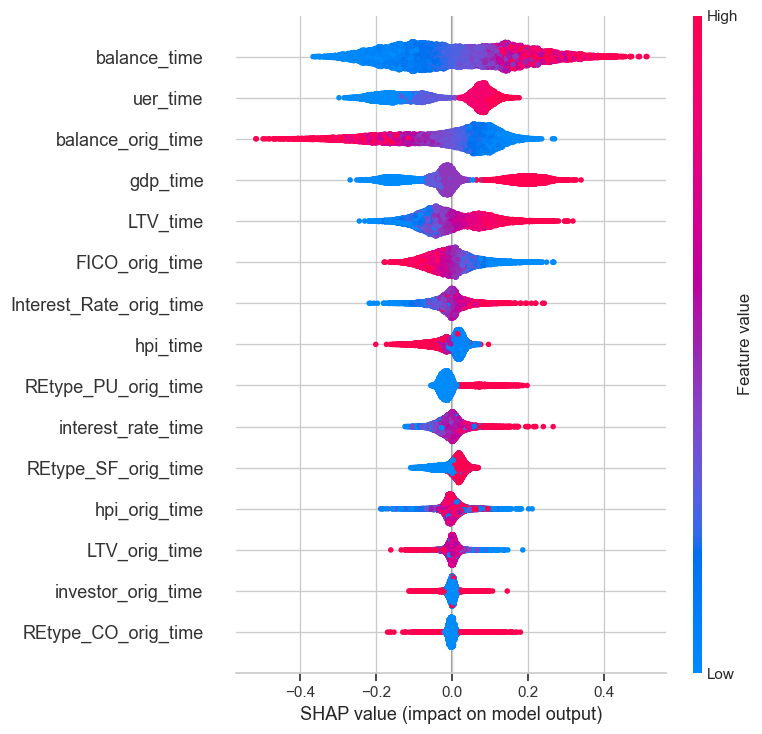

In [268]:
shap.summary_plot(shap_values_nn, X_test, feature_names=features)

### 4. RWA and Capital Requirement

#### This section calculates the RWA requirement for each of the different model types

#### Logistic

In [1273]:
scope_df = index_df[index_df.scope_ind == 1]

In [1274]:
scope_df.head()

,id,time,default_time,default_n12m,scope_ind,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
35,1,36,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,0.000000,0.446673,-0.132799,-0.030768,-0.288031,0.45258,0.0
47,1,48,1.0,1,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,-0.110058,0.446673,-0.132799,-0.030768,-0.288031,0.45258,0.0
215,4,36,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,0.000000,0.446673,-0.132799,0.238216,0.106437,0.45258,0.0
227,4,48,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,0.430814,-0.110058,0.446673,-0.132799,0.238216,0.106437,0.45258,0.0
239,4,60,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,-0.179396,-1.102189,0.559945,-1.532554,-0.987448,-1.196615,-0.132799,0.238216,0.106437,0.45258,0.0


In [1275]:
X = scope_df.drop('default_n12m',axis=1)
y = scope_df['default_n12m']

In [1276]:
X_train, X_test, y_train, y_test_logistic = train_test_split(X, y, test_size=0.3, random_state=42)

In [1277]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35319
1    17659
Name: count, dtype: int64

In [1278]:
X_train = X_resampled.iloc[:,4:]
X_test = X_test.iloc[:,4:]

In [1279]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [1280]:
X_train = X_train.drop(['LTV_time', 'balance_orig_time', 'REtype_PU_orig_time', 'Interest_Rate_orig_time', 'uer_time', 
                      'FICO_orig_time', 'LTV_time'], 
                     axis = 1)

In [1281]:
X_train.head()

,const,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,balance_time,interest_rate_time,hpi_time,gdp_time,LTV_orig_time,hpi_orig_time
0,1.0,-0.009467,0.025163,0.019025,-0.179396,-0.339746,-0.792917,0.000000,0.106437,0.265910
1,1.0,-0.009467,0.025163,0.019025,-0.179396,0.354470,0.430814,-0.110058,0.000000,0.000000
2,1.0,-0.009467,0.025163,0.019025,-0.179396,0.354470,-0.792917,0.000000,0.000000,0.265910
3,1.0,-0.009467,-0.039468,0.019025,0.237761,-0.339746,0.430814,-0.110058,-0.173025,-0.718452
4,1.0,-0.009467,0.025163,-0.123415,0.237761,0.354470,0.430814,-0.110058,0.000000,0.265910


In [1282]:
# Create a logistic regression model
model = sm.Logit(y_resampled, X_train)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.565296
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           default_n12m   No. Observations:                52978
Model:                          Logit   Df Residuals:                    52968
Method:                           MLE   Df Model:                            9
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.1119
Time:                        11:48:09   Log-Likelihood:                -29948.
converged:                       True   LL-Null:                       -33721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7040      0.012    -60.677      0.000      -0.727      -0.681
RE

In [1283]:
condition_1 = index_df['time'] == 60
condition_2 = index_df['default_time'] == 0

conditions = condition_1 & condition_2

In [1284]:
RWA_df = sm.add_constant(index_df)
RWA_df.head()

,const,id,time,default_time,default_n12m,scope_ind,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,...,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,1.0,1,1,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.0,0.0,0.0,0.0,0.0,-0.132799,0.0,0.0,0.0,0.0
1,1.0,1,2,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.0,0.0,0.0,0.0,0.0,-0.132799,0.0,0.0,0.0,0.0
2,1.0,1,3,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.0,0.0,0.0,0.0,0.0,-0.132799,0.0,0.0,0.0,0.0
3,1.0,1,4,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.0,0.0,0.0,0.0,0.0,-0.132799,0.0,0.0,0.0,0.0
4,1.0,1,5,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.0,0.0,0.0,0.0,0.0,-0.132799,0.0,0.0,0.0,0.0


In [1285]:
RWA_df = RWA_df[conditions]
RWA_df.head()

,const,id,time,default_time,default_n12m,scope_ind,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,...,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
59,1.0,1,60,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.132799,0.000000,0.000000,0.00000,0.0
119,1.0,2,60,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.132799,0.000000,0.000000,0.00000,0.0
179,1.0,3,60,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.132799,0.000000,0.000000,0.00000,0.0
239,1.0,4,60,0.0,0,1,-0.009467,-0.001545,0.025163,0.019025,...,-1.102189,0.559945,-1.532554,-0.987448,-1.196615,-0.132799,0.238216,0.106437,0.45258,0.0
299,1.0,5,60,0.0,0,0,-0.009467,-0.001545,-0.039468,0.019025,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.132799,0.000000,0.000000,0.00000,0.0


In [1286]:
RWA_df = RWA_df[RWA_df.scope_ind == 1]

In [1287]:
RWA_df_mod = RWA_df.drop(['LTV_time', 'balance_orig_time', 'REtype_PU_orig_time', 'Interest_Rate_orig_time', 'uer_time', 
                      'FICO_orig_time', 'LTV_time', 'id', 'time', 'default_time', 'default_n12m', 'scope_ind'], 
                     axis = 1)
RWA_df_mod.head()

,const,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,balance_time,interest_rate_time,hpi_time,gdp_time,LTV_orig_time,hpi_orig_time
239,1.0,-0.009467,0.025163,0.019025,-0.179396,0.559945,-1.532554,-0.987448,0.106437,0.000000
1679,1.0,-0.009467,0.025163,0.019025,-0.179396,0.000000,-1.532554,-0.987448,0.338957,-0.718452
1859,1.0,-0.009467,0.025163,0.019025,-0.179396,-0.339746,-1.532554,-0.987448,0.000000,-0.718452
3359,1.0,-0.009467,0.025163,0.019025,-0.179396,0.000000,-1.532554,-0.987448,0.000000,0.000000
3419,1.0,-0.009467,0.025163,0.019025,-0.179396,0.354470,-1.532554,-0.987448,0.000000,0.000000


In [1288]:
logistic_preds_RWA = result.predict(RWA_df_mod)

In [1290]:
lgd = 0.05
R = 0.15

In [1291]:
inv_preds = norm.ppf(logistic_preds_RWA)

In [1293]:
inside_norm = (inv_preds/np.sqrt(1-R)) + (np.sqrt(R/(1-R))) * norm.ppf(0.999)

In [1295]:
k = lgd*norm.cdf(inside_norm)-logistic_preds_RWA*lgd

In [1297]:
balance = pd.merge(RWA_df, mortgage, on=['id', 'time'], how='inner')['balance_time_y']

In [1299]:
rwa = k.values*12.5*balance.values

In [1300]:
sum(rwa)

301374585.00465274

In [1033]:
sum(rwa)/sum(balance.values)

0.20357280244181816

In [1034]:
sum(balance.values)/sum(rwa)

4.912247549796361

#### Decision Tree

In [1301]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [1302]:
scope_df = scope_df.fillna(scope_df.mean())

In [1303]:
features = sum([numeric_features,binary_variables],[])

In [1304]:
scope_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
35,1,36,-7.0,25.0,113.0,32688.30,28.963629,9.20,151.48,2.895760,...,69.4,9.2,201.141826,0.0,0.0,0.0,1,0.0,0,1
47,1,48,-7.0,25.0,113.0,29087.21,26.658065,9.20,146.45,2.715903,...,69.4,9.2,201.141826,1.0,0.0,1.0,1,1.0,1,1
215,4,36,-2.0,25.0,119.0,59222.20,49.156858,10.50,151.48,2.895760,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
227,4,48,-2.0,25.0,119.0,56462.50,48.475869,9.25,146.45,2.715903,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.50,189.82,2.836358,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1305]:
X = scope_df[features]
y = scope_df['default_n12m']

In [1306]:
X.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
35,32688.30,28.963629,9.20,151.48,2.895760,7.8,45000.0,715.0,69.4,9.2,201.141826,0.0,0.0,1.0,0.0
47,29087.21,26.658065,9.20,146.45,2.715903,8.3,45000.0,715.0,69.4,9.2,201.141826,0.0,0.0,1.0,0.0
215,59222.20,49.156858,10.50,151.48,2.895760,7.8,63750.0,587.0,81.8,10.5,201.141826,0.0,0.0,1.0,0.0
227,56462.50,48.475869,9.25,146.45,2.715903,8.3,63750.0,587.0,81.8,10.5,201.141826,0.0,0.0,1.0,0.0
239,52686.35,34.898842,10.50,189.82,2.836358,5.7,63750.0,587.0,81.8,10.5,201.141826,0.0,0.0,1.0,0.0


In [1041]:
X_train, X_test, y_train, y_test_dt = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [1042]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35307
1    17653
Name: count, dtype: int64

In [1043]:
sc = StandardScaler()
X_train = sc.fit_transform(X_resampled)
X_test = sc.fit_transform(X_test)

In [1045]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_split=5,min_samples_leaf=1,random_state=42)

dt_model.fit(X_train, y_resampled)

DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [1046]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
52955    1
52956    1
52957    1
52958    1
52959    1
Name: default_n12m, Length: 52960, dtype: int32

In [1307]:
condition_1 = scope_df['time'] == 60
condition_2 = scope_df['default_time'] == 0

conditions = condition_1 & condition_2

In [1308]:
RWA_df = scope_df[conditions]
RWA_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.500000,189.82,2.836358,...,81.800000,10.50000,201.141826,0.0,0.0,0.0,1,0.0,0,1
1679,28,60,18.0,25.0,140.0,48963.19,37.086592,6.566122,189.82,2.836358,...,85.000000,2.00000,186.910000,0.0,0.0,0.0,1,0.0,0,1
1859,31,60,19.0,25.0,139.0,62253.54,78.472847,4.874000,189.82,2.836358,...,78.455612,4.87400,191.420000,0.0,0.0,0.0,1,0.0,0,1
3359,56,60,-15.0,25.0,105.0,34562.30,16.897997,6.566122,189.82,2.836358,...,78.455612,6.55975,201.141826,0.0,0.0,0.0,1,0.0,0,1
3419,57,60,-14.0,25.0,106.0,20092.00,86.591131,8.990000,189.82,2.836358,...,78.455612,8.99000,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1309]:
RWA_df.shape

(7716, 27)

In [1310]:
RWA_df_mod = RWA_df[features]
RWA_df_mod.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
239,52686.35,34.898842,10.500000,189.82,2.836358,5.7,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
1679,48963.19,37.086592,6.566122,189.82,2.836358,5.7,110500.0,575.0,85.000000,2.00000,186.910000,0.0,0.0,1.0,0.0
1859,62253.54,78.472847,4.874000,189.82,2.836358,5.7,76000.0,639.0,78.455612,4.87400,191.420000,0.0,0.0,1.0,0.0
3359,34562.30,16.897997,6.566122,189.82,2.836358,5.7,44000.0,664.0,78.455612,6.55975,201.141826,0.0,0.0,1.0,0.0
3419,20092.00,86.591131,8.990000,189.82,2.836358,5.7,35100.0,669.0,78.455612,8.99000,201.141826,0.0,0.0,1.0,0.0


In [1311]:
sc = StandardScaler()
RWA_X = sc.fit_transform(RWA_df_mod)

In [1318]:
RWA_PD_dt = dt_model.predict_proba(RWA_X)

In [1320]:
RWA_class = dt_model.predict(RWA_X)

In [1321]:
elements = [sub_array[1] for sub_array in RWA_PD_dt]

dt_pd = np.array(elements)

In [1322]:
dt_pd[dt_pd == 0] += 0.0000000000000000000000000001

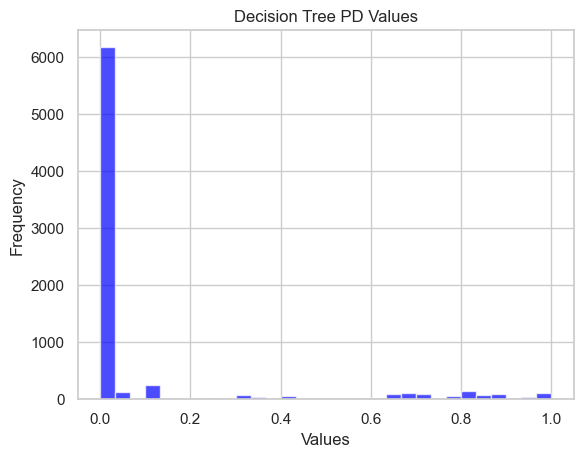

In [1448]:
plt.hist(dt_pd, bins=30, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Decision Tree PD Values')
plt.grid(True)
plt.show()

In [1324]:
lgd = 0.05
R = 0.15

In [1325]:
inv_preds = norm.ppf(dt_pd)

In [1327]:
inside_norm = (inv_preds/np.sqrt(1-R)) + (np.sqrt(R/(1-R))) * norm.ppf(0.999)

In [1329]:
k = lgd*norm.cdf(inside_norm)-dt_pd*lgd

In [1331]:
balance = pd.merge(RWA_df, mortgage, on=['id', 'time'], how='inner')['balance_time_y']

In [1333]:
rwa = k*12.5*balance

In [1338]:
sum(rwa)

43775075.300628334

In [1128]:
sum(rwa)/sum(balance.values)

0.0295692311145379

In [1129]:
sum(balance.values)/sum(rwa)

33.818938210684266

#### SVM

In [1587]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [1588]:
scope_df = scope_df.fillna(scope_df.mean())

In [1589]:
X = scope_df[features]
y = scope_df['default_n12m']

X_train, X_test, y_train, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=52)

In [1590]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35287
1    17643
Name: count, dtype: int64

In [1591]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.fit_transform(X_test)

In [1135]:
svm_model = svm.SVC(kernel='rbf', gamma='auto', C=10, probability= True)

svm_model.fit(X_train, y_resampled)

SVC(C=10, gamma='auto', probability=True)

In [1596]:
condition_1 = scope_df['time'] == 60
condition_2 = scope_df['default_time'] == 0

conditions = condition_1 & condition_2

In [1597]:
RWA_df = scope_df[conditions]
RWA_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.500000,189.82,2.836358,...,81.800000,10.50000,201.141826,0.0,0.0,0.0,1,0.0,0,1
1679,28,60,18.0,25.0,140.0,48963.19,37.086592,6.566122,189.82,2.836358,...,85.000000,2.00000,186.910000,0.0,0.0,0.0,1,0.0,0,1
1859,31,60,19.0,25.0,139.0,62253.54,78.472847,4.874000,189.82,2.836358,...,78.455612,4.87400,191.420000,0.0,0.0,0.0,1,0.0,0,1
3359,56,60,-15.0,25.0,105.0,34562.30,16.897997,6.566122,189.82,2.836358,...,78.455612,6.55975,201.141826,0.0,0.0,0.0,1,0.0,0,1
3419,57,60,-14.0,25.0,106.0,20092.00,86.591131,8.990000,189.82,2.836358,...,78.455612,8.99000,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1598]:
RWA_df.shape

(7716, 27)

In [1599]:
RWA_y = RWA_df['default_n12m']

In [1600]:
RWA_df_mod = RWA_df[features]
RWA_df_mod.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
239,52686.35,34.898842,10.500000,189.82,2.836358,5.7,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
1679,48963.19,37.086592,6.566122,189.82,2.836358,5.7,110500.0,575.0,85.000000,2.00000,186.910000,0.0,0.0,1.0,0.0
1859,62253.54,78.472847,4.874000,189.82,2.836358,5.7,76000.0,639.0,78.455612,4.87400,191.420000,0.0,0.0,1.0,0.0
3359,34562.30,16.897997,6.566122,189.82,2.836358,5.7,44000.0,664.0,78.455612,6.55975,201.141826,0.0,0.0,1.0,0.0
3419,20092.00,86.591131,8.990000,189.82,2.836358,5.7,35100.0,669.0,78.455612,8.99000,201.141826,0.0,0.0,1.0,0.0


In [1601]:
sc = StandardScaler()
RWA_X = sc.fit_transform(RWA_df_mod)

In [1602]:
len(RWA_X)

7716

In [1603]:
RWA_X

array([[-0.93482252, -1.92575996,  2.31404963, ..., -0.35556062,
         0.79410337, -0.40710564],
       [-0.95982999, -1.81547139,  0.40789653, ..., -0.35556062,
         0.79410337, -0.40710564],
       [-0.87056226,  0.27088772, -0.41201826, ..., -0.35556062,
         0.79410337, -0.40710564],
       ...,
       [-0.32366828, -0.06064269, -1.32006149, ..., -0.35556062,
        -1.25928189, -0.40710564],
       [ 0.45327736, -1.53550593, -1.44362127, ..., -0.35556062,
        -1.25928189, -0.40710564],
       [ 2.05301532, -1.01206284, -1.49692157, ..., -0.35556062,
        -1.25928189, -0.40710564]])

In [1346]:
RWA_PD_SVM = svm_model.predict_proba(RWA_X)

In [1348]:
elements = [sub_array[1] for sub_array in RWA_PD_SVM]

svm_pd = np.array(elements)

In [1350]:
lgd = 0.05
R = 0.15

In [1351]:
inv_preds = norm.ppf(svm_pd)

In [1353]:
inside_norm = (inv_preds/np.sqrt(1-R)) + (np.sqrt(R/(1-R))) * norm.ppf(0.999)

In [1355]:
k = lgd*norm.cdf(inside_norm)-svm_pd*lgd

In [1357]:
balance = pd.merge(RWA_df, mortgage, on=['id', 'time'], how='inner')['balance_time_y']

In [1359]:
rwa = k*12.5*balance

In [1361]:
sum(rwa)

252858596.26339278

In [1159]:
sum(rwa)/sum(balance.values)

0.17080117443230464

In [1160]:
sum(balance.values)/sum(rwa)

5.85476067903936

#### Random Forest

In [1162]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [1163]:
scope_df = scope_df.fillna(scope_df.mean())

In [1164]:
data = scope_df

In [1165]:
X = data[features]
y = data['default_n12m']

In [1166]:
X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=142)

In [1167]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35286
1    17643
Name: count, dtype: int64

In [1168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.fit_transform(X_test)

In [1169]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_split=2,min_samples_leaf=1,random_state=42)

In [1170]:
rf_model.fit(X_train, y_resampled)

RandomForestClassifier(max_depth=15, random_state=42)

In [1586]:
rf_model.feature_importances_

array([0.11361718, 0.18170502, 0.10829043, 0.04876905, 0.0200784 ,
       0.04333738, 0.10368119, 0.11853256, 0.04829128, 0.09207707,
       0.08278373, 0.00664253, 0.00798794, 0.01426354, 0.0099427 ])

In [1362]:
condition_1 = scope_df['time'] == 60
condition_2 = scope_df['default_time'] == 0

conditions = condition_1 & condition_2

In [1363]:
RWA_df = scope_df[conditions]
RWA_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.500000,189.82,2.836358,...,81.800000,10.50000,201.141826,0.0,0.0,0.0,1,0.0,0,1
1679,28,60,18.0,25.0,140.0,48963.19,37.086592,6.566122,189.82,2.836358,...,85.000000,2.00000,186.910000,0.0,0.0,0.0,1,0.0,0,1
1859,31,60,19.0,25.0,139.0,62253.54,78.472847,4.874000,189.82,2.836358,...,78.455612,4.87400,191.420000,0.0,0.0,0.0,1,0.0,0,1
3359,56,60,-15.0,25.0,105.0,34562.30,16.897997,6.566122,189.82,2.836358,...,78.455612,6.55975,201.141826,0.0,0.0,0.0,1,0.0,0,1
3419,57,60,-14.0,25.0,106.0,20092.00,86.591131,8.990000,189.82,2.836358,...,78.455612,8.99000,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1364]:
RWA_df.shape

(7716, 27)

In [1365]:
RWA_df_mod = RWA_df[features]
RWA_df_mod.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
239,52686.35,34.898842,10.500000,189.82,2.836358,5.7,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
1679,48963.19,37.086592,6.566122,189.82,2.836358,5.7,110500.0,575.0,85.000000,2.00000,186.910000,0.0,0.0,1.0,0.0
1859,62253.54,78.472847,4.874000,189.82,2.836358,5.7,76000.0,639.0,78.455612,4.87400,191.420000,0.0,0.0,1.0,0.0
3359,34562.30,16.897997,6.566122,189.82,2.836358,5.7,44000.0,664.0,78.455612,6.55975,201.141826,0.0,0.0,1.0,0.0
3419,20092.00,86.591131,8.990000,189.82,2.836358,5.7,35100.0,669.0,78.455612,8.99000,201.141826,0.0,0.0,1.0,0.0


In [1366]:
sc = StandardScaler()
RWA_X = sc.fit_transform(RWA_df_mod)

In [1367]:
len(RWA_X)

7716

In [1368]:
RWA_X

array([[-0.93482252, -1.92575996,  2.31404963, ..., -0.35556062,
         0.79410337, -0.40710564],
       [-0.95982999, -1.81547139,  0.40789653, ..., -0.35556062,
         0.79410337, -0.40710564],
       [-0.87056226,  0.27088772, -0.41201826, ..., -0.35556062,
         0.79410337, -0.40710564],
       ...,
       [-0.32366828, -0.06064269, -1.32006149, ..., -0.35556062,
        -1.25928189, -0.40710564],
       [ 0.45327736, -1.53550593, -1.44362127, ..., -0.35556062,
        -1.25928189, -0.40710564],
       [ 2.05301532, -1.01206284, -1.49692157, ..., -0.35556062,
        -1.25928189, -0.40710564]])

In [1369]:
RWA_PD_rf = rf_model.predict_proba(RWA_X)

In [1371]:
elements = [sub_array[1] for sub_array in RWA_PD_rf]

rf_pd = np.array(elements)

In [1373]:
lgd = 0.05
R = 0.15

In [1374]:
inv_preds = norm.ppf(rf_pd)

In [1376]:
inside_norm = (inv_preds/np.sqrt(1-R)) + (np.sqrt(R/(1-R))) * norm.ppf(0.999)

In [1378]:
k = lgd*norm.cdf(inside_norm)-rf_pd*lgd

In [1380]:
balance = pd.merge(RWA_df, mortgage, on=['id', 'time'], how='inner')['balance_time_y']

In [1382]:
rwa = k*12.5*balance

In [1384]:
sum(rwa)

294369311.26748973

In [1195]:
sum(rwa)/sum(balance.values)

0.1988408732165176

In [1196]:
sum(balance.values)/sum(rwa)

5.029147095482231

#### ANN

In [1396]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [1397]:
scope_df = scope_df.fillna(scope_df.mean())

In [1398]:
data = scope_df

In [1399]:
X = data[features]
y = data['default_n12m']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [1400]:
X_train, X_test, y_train, y_test_nn = train_test_split(X, y, test_size=0.3, random_state=88)

In [1401]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35281
1    17640
Name: count, dtype: int64

In [1402]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1403]:
model.fit(X_resampled, y_resampled, epochs=20, batch_size=16, validation_data=(X_test, y_test_nn))

Epoch 1/20
3308/3308 [==============================] - 7s 2ms/step - loss: 0.5388 - accuracy: 0.7147 - val_loss: 0.3683 - val_accuracy: 0.8356
Epoch 2/20
3308/3308 [==============================] - 5s 2ms/step - loss: 0.5183 - accuracy: 0.7324 - val_loss: 0.3558 - val_accuracy: 0.8355
Epoch 3/20
3308/3308 [==============================] - 5s 2ms/step - loss: 0.5126 - accuracy: 0.7349 - val_loss: 0.3545 - val_accuracy: 0.8425
Epoch 4/20
3308/3308 [==============================] - 6s 2ms/step - loss: 0.5077 - accuracy: 0.7385 - val_loss: 0.3666 - val_accuracy: 0.8259
Epoch 5/20
3308/3308 [==============================] - 6s 2ms/step - loss: 0.5045 - accuracy: 0.7392 - val_loss: 0.3514 - val_accuracy: 0.8408
Epoch 6/20
3308/3308 [==============================] - 5s 2ms/step - loss: 0.5015 - accuracy: 0.7399 - val_loss: 0.3334 - val_accuracy: 0.8569
Epoch 7/20
3308/3308 [==============================] - 6s 2ms/step - loss: 0.4990 - accuracy: 0.7418 - val_loss: 0.3524 - val_accuracy:

In [1404]:
condition_1 = scope_df['time'] == 60
condition_2 = scope_df['default_time'] == 0

conditions = condition_1 & condition_2

In [1405]:
RWA_df = scope_df[conditions]
RWA_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.500000,189.82,2.836358,...,81.800000,10.50000,201.141826,0.0,0.0,0.0,1,0.0,0,1
1679,28,60,18.0,25.0,140.0,48963.19,37.086592,6.566122,189.82,2.836358,...,85.000000,2.00000,186.910000,0.0,0.0,0.0,1,0.0,0,1
1859,31,60,19.0,25.0,139.0,62253.54,78.472847,4.874000,189.82,2.836358,...,78.455612,4.87400,191.420000,0.0,0.0,0.0,1,0.0,0,1
3359,56,60,-15.0,25.0,105.0,34562.30,16.897997,6.566122,189.82,2.836358,...,78.455612,6.55975,201.141826,0.0,0.0,0.0,1,0.0,0,1
3419,57,60,-14.0,25.0,106.0,20092.00,86.591131,8.990000,189.82,2.836358,...,78.455612,8.99000,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1406]:
RWA_df.shape

(7716, 27)

In [1407]:
RWA_df_mod = RWA_df[features]
RWA_df_mod.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
239,52686.35,34.898842,10.500000,189.82,2.836358,5.7,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
1679,48963.19,37.086592,6.566122,189.82,2.836358,5.7,110500.0,575.0,85.000000,2.00000,186.910000,0.0,0.0,1.0,0.0
1859,62253.54,78.472847,4.874000,189.82,2.836358,5.7,76000.0,639.0,78.455612,4.87400,191.420000,0.0,0.0,1.0,0.0
3359,34562.30,16.897997,6.566122,189.82,2.836358,5.7,44000.0,664.0,78.455612,6.55975,201.141826,0.0,0.0,1.0,0.0
3419,20092.00,86.591131,8.990000,189.82,2.836358,5.7,35100.0,669.0,78.455612,8.99000,201.141826,0.0,0.0,1.0,0.0


In [1408]:
sc = StandardScaler()
RWA_X = sc.fit_transform(RWA_df_mod)

In [1411]:
RWA_PD_nn = model.predict(RWA_X)

242/242 [==============================] - 0s 1ms/step


In [1413]:
lgd = 0.05
R = 0.15

In [1414]:
inv_preds = norm.ppf(RWA_PD_nn)

In [1416]:
inside_norm = (inv_preds/np.sqrt(1-R)) + (np.sqrt(R/(1-R))) * norm.ppf(0.999)

In [1418]:
k = lgd*norm.cdf(inside_norm)-RWA_PD_nn*lgd

In [1419]:
balance = pd.merge(RWA_df, mortgage, on=['id', 'time'], how='inner')['balance_time_y']

In [1421]:
k = k.flatten()

In [1422]:
rwa = k*12.5*balance

In [1424]:
sum(rwa)

322778129.47241396

In [1227]:
sum(rwa)/sum(balance.values)

0.2150157636988936

In [1228]:
sum(balance.values)/sum(rwa)

4.650821794630798

#### XGBoost

In [1230]:
scope_df = full_time_series[full_time_series.scope_ind == 1]

In [1231]:
scope_df = scope_df.fillna(scope_df.mean())

In [1232]:
scope_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
35,1,36,-7.0,25.0,113.0,32688.30,28.963629,9.20,151.48,2.895760,...,69.4,9.2,201.141826,0.0,0.0,0.0,1,0.0,0,1
47,1,48,-7.0,25.0,113.0,29087.21,26.658065,9.20,146.45,2.715903,...,69.4,9.2,201.141826,1.0,0.0,1.0,1,1.0,1,1
215,4,36,-2.0,25.0,119.0,59222.20,49.156858,10.50,151.48,2.895760,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
227,4,48,-2.0,25.0,119.0,56462.50,48.475869,9.25,146.45,2.715903,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.50,189.82,2.836358,...,81.8,10.5,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1233]:
X = scope_df[features]
y = scope_df['default_n12m']

In [1234]:
X_train, X_test, y_train, y_test_xgb = train_test_split(X, y, test_size=0.3, random_state=67)

In [1235]:
ros = RandomOverSampler(random_state=52, sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

default_n12m
0    35265
1    17632
Name: count, dtype: int64

In [1236]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.fit_transform(X_test)

In [1237]:
len(X_train)

52897

In [1238]:
xgb_model = xgb.XGBClassifier()

In [1239]:
xgb_model = xgb.XGBClassifier(max_depth=3,learning_rate=0.01,n_estimators=50, colsample_bytree= 0.8, gamma = 0,subsample=0.8,
                              random_state=42)

In [1240]:
xgb_model.fit(X_train, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [1425]:
condition_1 = scope_df['time'] == 60
condition_2 = scope_df['default_time'] == 0

conditions = condition_1 & condition_2

In [1426]:
RWA_df = scope_df[conditions]
RWA_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,dec_ind,def_ind,default_n12m,scope_ind
239,4,60,-2.0,25.0,119.0,52686.35,34.898842,10.500000,189.82,2.836358,...,81.800000,10.50000,201.141826,0.0,0.0,0.0,1,0.0,0,1
1679,28,60,18.0,25.0,140.0,48963.19,37.086592,6.566122,189.82,2.836358,...,85.000000,2.00000,186.910000,0.0,0.0,0.0,1,0.0,0,1
1859,31,60,19.0,25.0,139.0,62253.54,78.472847,4.874000,189.82,2.836358,...,78.455612,4.87400,191.420000,0.0,0.0,0.0,1,0.0,0,1
3359,56,60,-15.0,25.0,105.0,34562.30,16.897997,6.566122,189.82,2.836358,...,78.455612,6.55975,201.141826,0.0,0.0,0.0,1,0.0,0,1
3419,57,60,-14.0,25.0,106.0,20092.00,86.591131,8.990000,189.82,2.836358,...,78.455612,8.99000,201.141826,0.0,0.0,0.0,1,0.0,0,1


In [1427]:
RWA_df.shape

(7716, 27)

In [1428]:
RWA_df_mod = RWA_df[features]
RWA_df_mod.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time
239,52686.35,34.898842,10.500000,189.82,2.836358,5.7,63750.0,587.0,81.800000,10.50000,201.141826,0.0,0.0,1.0,0.0
1679,48963.19,37.086592,6.566122,189.82,2.836358,5.7,110500.0,575.0,85.000000,2.00000,186.910000,0.0,0.0,1.0,0.0
1859,62253.54,78.472847,4.874000,189.82,2.836358,5.7,76000.0,639.0,78.455612,4.87400,191.420000,0.0,0.0,1.0,0.0
3359,34562.30,16.897997,6.566122,189.82,2.836358,5.7,44000.0,664.0,78.455612,6.55975,201.141826,0.0,0.0,1.0,0.0
3419,20092.00,86.591131,8.990000,189.82,2.836358,5.7,35100.0,669.0,78.455612,8.99000,201.141826,0.0,0.0,1.0,0.0


In [1429]:
sc = StandardScaler()
RWA_X = sc.fit_transform(RWA_df_mod)

In [1432]:
RWA_PD_xgb = xgb_model.predict_proba(RWA_X)[:, 1]

In [1433]:
lgd = 0.05
R = 0.15

In [1434]:
inv_preds = norm.ppf(RWA_PD_xgb)

In [1436]:
inside_norm = (inv_preds/np.sqrt(1-R)) + (np.sqrt(R/(1-R))) * norm.ppf(0.999)

In [1438]:
k = lgd*norm.cdf(inside_norm)-RWA_PD_xgb*lgd

In [1440]:
balance = pd.merge(RWA_df, mortgage, on=['id', 'time'], how='inner')['balance_time_y']

In [1442]:
rwa = k*12.5*balance

In [1444]:
sum(rwa)

428823907.4605769

In [1261]:
sum(rwa)/sum(balance.values)

0.28966239669630006

In [1262]:
sum(balance.values)/sum(rwa)

3.4522948487803258

In [1263]:
sum(balance.values)

1480426566.7600007

#### RWA PD dataset predctions

In [1458]:
data = {'Logistic': logistic_preds_RWA.values,
        'DT': dt_pd,
        'SVM': svm_pd,
        'RF': rf_pd,
        'ANN': RWA_PD_nn.flatten(),
        'XGBoost': RWA_PD_xgb
       }

df = pd.DataFrame(data)

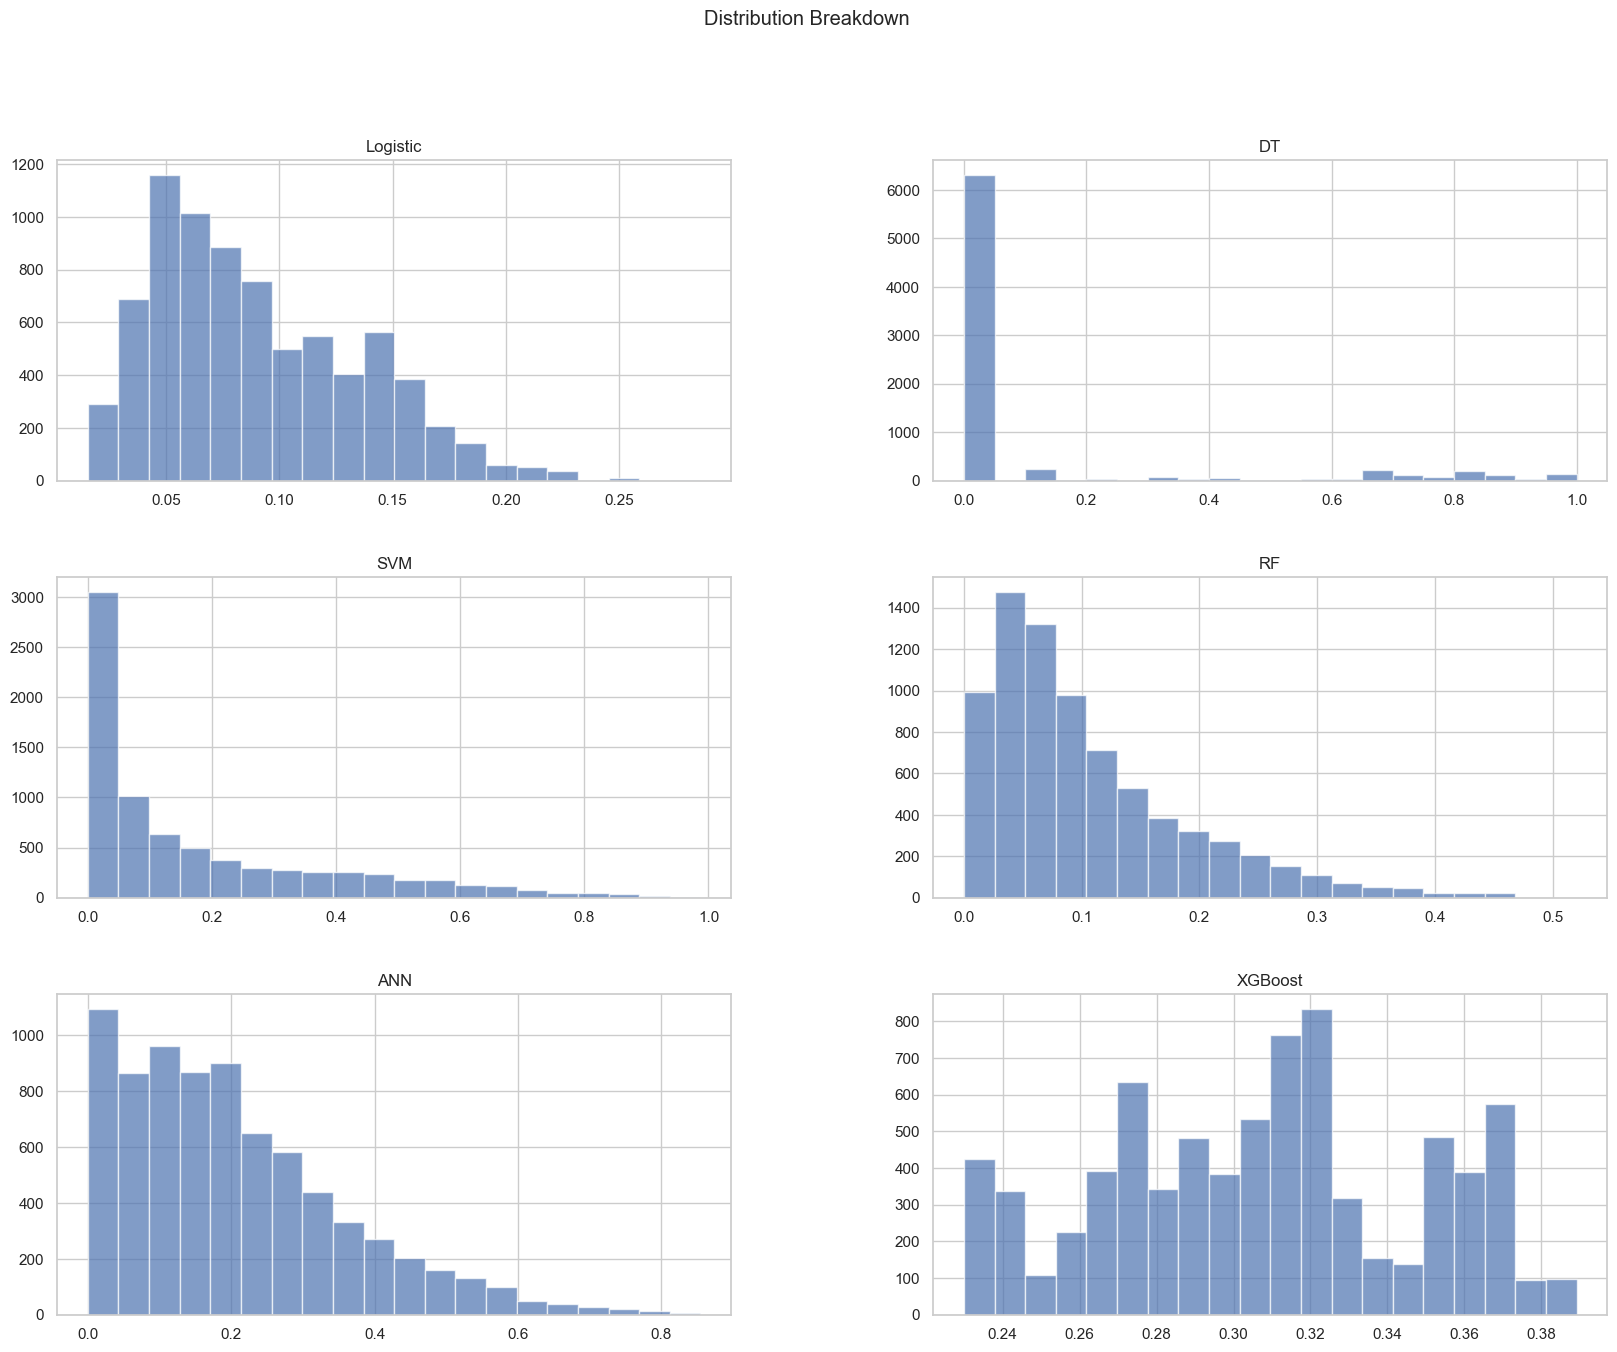

In [1459]:
df.hist(bins=20, figsize=(20, 15), alpha=0.7)
plt.suptitle('Distribution Breakdown', x=0.5, y=0.98)
plt.show()

In [1460]:
max(svm_pd)

0.9871485909389984

In [1461]:
max(rf_pd)

0.5201848468642781

In [1462]:
max(logistic_preds_RWA.values)

0.2858232596298365

### 5. Primary Research

#### This section imports the survey results gathered as part of the primary research exercise carried out by student

In [1463]:
survey = pd.read_excel("Survey Monkey SBS23038.xlsx")

In [1464]:
survey.head()

,Response,Have you encountered any Machine Learning applications in the Financial Services Industry?,"If you answered 'Yes' to the previous question, in what function of Financial Services have you encountered the Machine Learning application (example(s): Fraud detection, Financial crime, Credit risk)?",Which of the following Machine Learning algorithms have you heard of?,To what extent would you support the implementation of Machine Learning applications with regards to Credit Risk modelling (0 having no appetite for implementation and 5 having a strong appetite for implementation)?,"If you are in favour of the implementation of Machine Learning applications in Credit Risk modelling, where do you see the potential opportunity (example: factor selection for model development, testing for model validation)?","If you are not in favour of the implementation of Machine Learning applications in Credit Risk modelling, what are the contributing factors?",Please add any other comments you think might be important to note for the benefit of this study.
0,1,Yes,Decision making models for granting loans,"Logistic Regression, Decision Tree, Random For...",4,"Segmentation, challenger models, factors from ...",Lack of interpret-ability for stakeholders at ...,NaN
1,2,Yes,Credit Risk,"Logistic Regression, Decision Tree, Random Forest",4,I do not know enough to identify opportunistic...,NaN,NaN
2,3,Yes,"Credit Risk, (simple regression in an ECL)","Logistic Regression, Decision Tree, Random For...",5,Model Validation,NaN,NaN
3,4,Yes,Climate Risk,"Logistic Regression, Decision Tree, Random For...",4,"Dealing with large datasets, introduces opport...",Not as transparent as traditional modelling,NaN
4,5,Yes,Credit Risk,"Logistic Regression, Decision Tree, Random For...",4,"Segmentation, challenger models, factor analysis",NaN,The main barrier for ML in credit risk is the ...


In [1465]:
survey.tail()

,Response,Have you encountered any Machine Learning applications in the Financial Services Industry?,"If you answered 'Yes' to the previous question, in what function of Financial Services have you encountered the Machine Learning application (example(s): Fraud detection, Financial crime, Credit risk)?",Which of the following Machine Learning algorithms have you heard of?,To what extent would you support the implementation of Machine Learning applications with regards to Credit Risk modelling (0 having no appetite for implementation and 5 having a strong appetite for implementation)?,"If you are in favour of the implementation of Machine Learning applications in Credit Risk modelling, where do you see the potential opportunity (example: factor selection for model development, testing for model validation)?","If you are not in favour of the implementation of Machine Learning applications in Credit Risk modelling, what are the contributing factors?",Please add any other comments you think might be important to note for the benefit of this study.
16,17,No,NaN,"Logistic Regression, Decision Tree, Random Forest",3,factor selection,not easy to replicate,NaN
17,18,Yes,"Credit Risk, Concentration Risk, Operational R...","Logistic Regression, Decision Tree, Random For...",5,"Feature engineering within model development, ...",NaN,NaN
18,19,Yes,Credit Risk,"Logistic Regression, Decision Tree, Random For...",4,"machine learning can help model non-linear, so...",NaN,NaN
19,20,Yes,Credit Risk,"Logistic Regression, Decision Tree, Random For...",5,"Improving Factor Selection, Improving Credit R...",NaN,NaN
20,21,No,NaN,"Logistic Regression, Decision Tree, Random Forest",3,NaN,NaN,NaN


In [1467]:
survey.columns[1]

'Have you encountered any Machine Learning applications in the Financial Services Industry?'

In [1468]:
survey[survey.columns[1]].value_counts(normalize=True) * 100

Have you encountered any Machine Learning applications in the Financial Services Industry?
Yes    61.904762
No     38.095238
Name: proportion, dtype: float64

In [1511]:
survey['log_ind'] = survey[survey.columns[3]].str.contains('Logistic',case=False, regex=True)
survey['dt_ind'] = survey[survey.columns[3]].str.contains('Decision', case=False, regex=True)
survey['svm_ind'] = survey[survey.columns[3]].str.contains('Random', case=False, regex=True)
survey['rf_ind'] = survey[survey.columns[3]].str.contains('Support', case=False, regex=True)
survey['ann_ind'] = survey[survey.columns[3]].str.contains('Artificial', case=False, regex=True)
survey['xgb_ind'] = survey[survey.columns[3]].str.contains('XGBoost', case=False, regex=True)

In [1528]:
survey.columns[3]

'Which of the following Machine Learning algorithms have you heard of?'

In [1518]:
log_ind = survey['log_ind'].value_counts(normalize=True) * 100

In [1521]:
log_ind[0]

100.0

In [1522]:
dt_ind = survey['dt_ind'].value_counts(normalize=True) * 100
dt_ind[0]

95.0

In [1523]:
svm_ind = survey['svm_ind'].value_counts(normalize=True) * 100
svm_ind[0]

90.0

In [1524]:
rf_ind = survey['rf_ind'].value_counts(normalize=True) * 100
rf_ind[0]

55.00000000000001

In [1525]:
ann_ind = survey['ann_ind'].value_counts(normalize=True) * 100
ann_ind[0]

55.00000000000001

In [1526]:
xgb_ind = survey['xgb_ind'].value_counts(normalize=True) * 100
xgb_ind[0]

55.00000000000001

In [1527]:
bar_plot_df = pd.DataFrame({
    'Models': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine (SVM)', 
               'Artificial Neural Network (ANN)', 'XGBoost'],
    'Values': [log_ind[0],dt_ind[0],rf_ind[0],svm_ind[0],ann_ind[0],xgb_ind[0]]
})

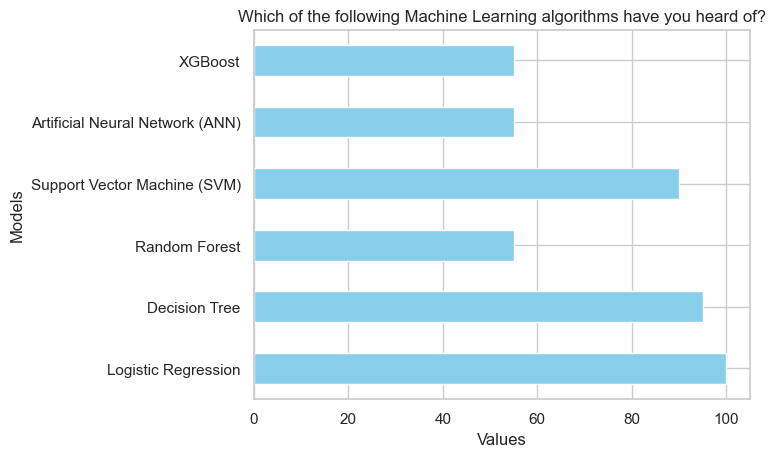

In [1561]:
bar_plot_df.plot(x='Models', y='Values', kind='barh', color='skyblue', legend=False)
plt.xlabel('Values')
plt.ylabel('Models')
plt.title(survey.columns[3])
plt.show()

In [1557]:
zero_series = (sum(survey[survey.columns[4]].values == 0)/survey.shape[0]) * 100
one_series = (sum(survey[survey.columns[4]].values == 1)/survey.shape[0])* 100
two_series = (sum(survey[survey.columns[4]].values == 2)/survey.shape[0])* 100
three_series = (sum(survey[survey.columns[4]].values == 3)/survey.shape[0])* 100
four_series = (sum(survey[survey.columns[4]].values == 4)/survey.shape[0])* 100
five_series = (sum(survey[survey.columns[4]].values == 5)/survey.shape[0])* 100

In [1559]:
support_df = pd.DataFrame({
    'Support Level': [0,1,2,3,4,5],
    'Values': [zero_series, one_series, two_series, three_series, four_series, five_series]
})

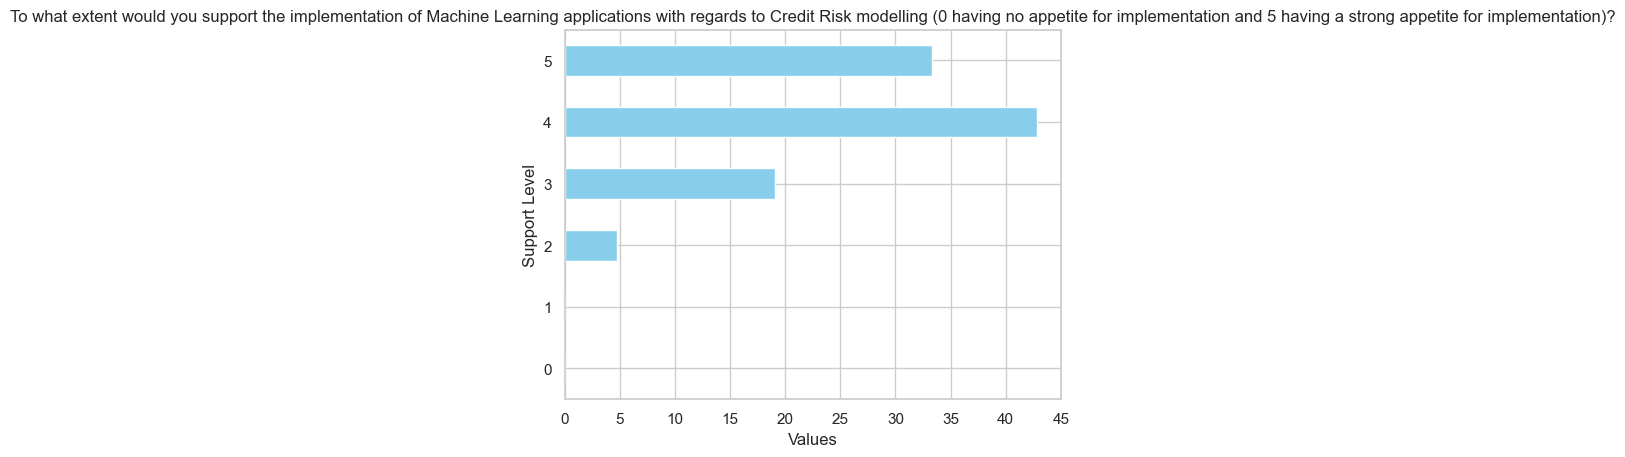

In [1562]:
support_df.plot(x='Support Level', y='Values', kind='barh', color='skyblue', legend=False)
plt.xlabel('Values')
plt.ylabel('Support Level')
plt.title(survey.columns[4])
plt.show()